# IA048 - Aprendizado de Máquina 
## Exercício de Fixação de Conceitos (EFC) 3 - 2s2020

### Exercício 1

In [2]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn as sk    
from sklearn import preprocessing
import numpy as np
import seaborn as sns 
import torch as th
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch import optim

In [3]:
data = pd.read_csv("dados_diabetes.csv")

In [4]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
data.info()
data["Outcome"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


0    500
1    268
Name: Outcome, dtype: int64

As one may see from the last execution, our dataset is not balanced since we have 500 non-diabetics and 268 diabetics.

In [6]:
diabet = data.loc[data["Outcome"] == 1]
n_diabet = data.loc[data["Outcome"] == 0]

In [7]:
features = diabet.columns.tolist()

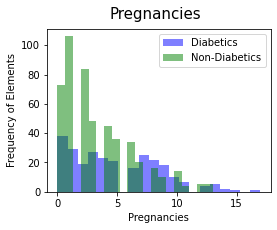

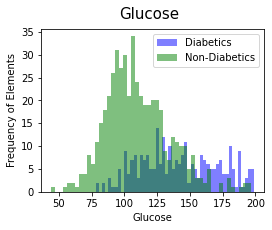

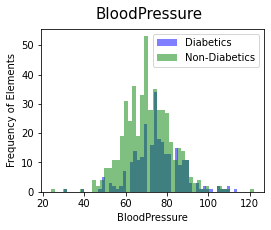

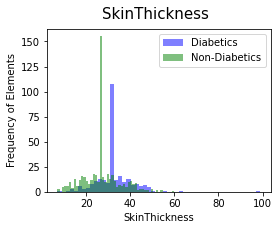

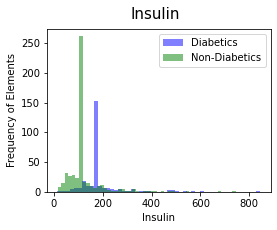

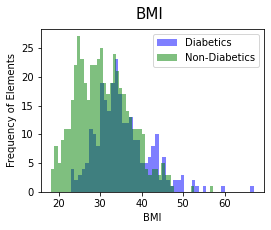

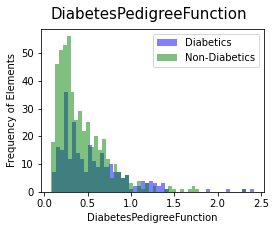

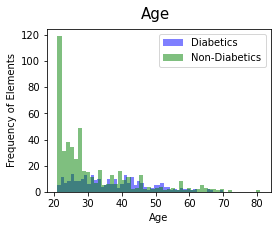

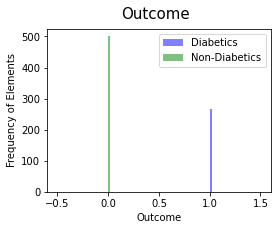

In [8]:
for k in features:
    plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
    if (k == "Pregnancies"):
        plt.hist(diabet[k],bins=20,alpha=0.5,label='Diabetics',color='Blue')
        plt.hist(n_diabet[k],bins=20,alpha=0.5,label='Non-Diabetics',color='Green')
    else:
        plt.hist(diabet[k],bins=50,alpha=0.5,label='Diabetics',color='Blue')
        plt.hist(n_diabet[k],bins=50,alpha=0.5,label='Non-Diabetics',color='Green')
    plt.legend(loc='upper right')
    plt.suptitle(k, fontsize = 15)
    plt.xlabel(k)
    plt.ylabel("Frequency of Elements")
    plt.show()

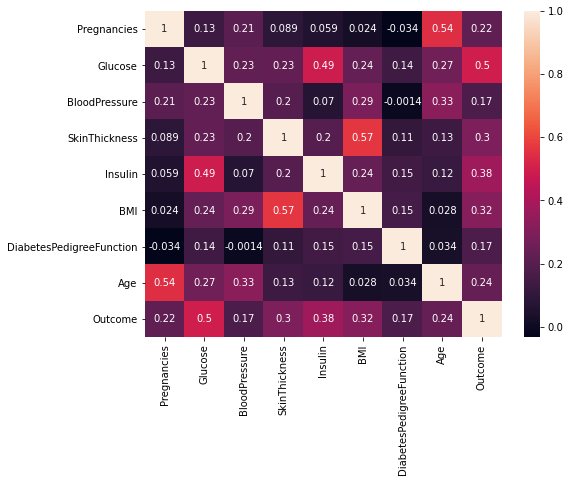

In [9]:
data_corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data_corr, annot = True)
plt.show()

In [9]:
# Normalizing our data with the MinMax Scaler
data_np = data.values
min_max_scaler = preprocessing.MinMaxScaler()
data_np_norm = min_max_scaler.fit_transform(data_np)
data_norm = pd.DataFrame(data_np_norm, columns= data.columns)

In [10]:
# Separating the labels from the features
label = data_norm['Outcome']
x = data_norm.drop(columns=['Outcome'])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,label,stratify=label,test_size=0.2)

In [12]:
# Let's observe if the train test stratified split worked well, we can verify if the proportion of samples
# in the class 0 and 1 are still around the same from the original data
display(y_train.value_counts())
display(y_test.value_counts())

0.0    400
1.0    214
Name: Outcome, dtype: int64

0.0    100
1.0     54
Name: Outcome, dtype: int64

In [13]:
X_test = X_test.to_numpy()
X_train = X_train.to_numpy()
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()

In [14]:
#Now that we pre-treated our data we may implement our Deep Learning models
import torch as th
import torch.nn as nn

X_train = th.from_numpy(X_train).float()
X_test = th.from_numpy(X_test).float()
y_train = th.from_numpy(y_train).float()
y_test = th.from_numpy(y_test).float()


In [15]:
display(y_train.shape)
display(y_test.shape)
display(X_train.shape)
display(X_test.shape)

torch.Size([614])

torch.Size([154])

torch.Size([614, 8])

torch.Size([154, 8])

In [16]:
X_train = X_train
X_test = X_test
y_train = y_train
y_test = y_test

In [17]:
# Let's use a mini-batching with SGD to train our model
from sklearn.metrics import accuracy_score

def train(model, optmizer, loss_fn, epochs, batch_size, X_train, y_train, X_test, y_test, verbose=False):
    # Mini-batching and shuffling
    Ntrain = X_train.shape[0]
    Nvalid = X_test.shape[0]
    idx = np.arange(Ntrain)
    # We need to 'break' the training dataset in multiple batches
    nbatch = int(Ntrain/batch_size)

    train_losses, valid_losses, valid_acc = [],[],[]

    for epoch in range(epochs):

        np.random.shuffle(idx)
        running_loss = 0
        # Number of samples in the next loop
        totaln = 0

        for bat in range(nbatch):

            ids = idx[bat*batch_size:(bat+1)*batch_size]
            features = X_train[ids]
            labels = y_train[ids]
            totaln = totaln + labels.shape[0]

            optimizer.zero_grad()
            model_application = model(features)
            loss = loss_fn(model_application,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        
        accuracy = 0
        valid_loss = 0
        with th.no_grad():
            features = X_test
            labels = y_test
            model_application = model(features)
            valid_loss = loss_fn(model_application, labels)
            y_pred = []

            for k in range(len(model_application)):
                if (model_application[k] >= 0.5):
                    y_pred.append(1)
                else:
                    y_pred.append(0)

            accuracy = accuracy_score(y_pred, labels)

            train_losses.append(running_loss/batch_size)
            valid_losses.append(valid_loss)
            valid_acc.append(accuracy*100)
            #print("Epoch: {}\t".format(epoch),
              #"train Loss: {:.5f}.. ".format(train_losses[-1]),
              #"valid Loss: {:.5f}.. ".format(valid_losses[-1]),
              #"valid Accuracy: {:.3f}".format(valid_acc[-1]))  

    print("---------- Best : {:.3f}".format(max(valid_acc)), " at epoch " 
      , np.fromiter(valid_acc, dtype=np.float).argmax(), " / ",epochs )
    
    #plt.figure(figsize = (9, 1.5))
    #ax= plt.subplot(1, 3, 1)
    #plt.plot(train_losses)
    #ax.set_ylim(bottom=0)
    #ax= plt.subplot(1, 3, 2)
    #plt.plot(valid_losses)
    #ax.set_ylim(bottom=0)
    #ax= plt.subplot(1, 3, 3)
    #plt.plot(valid_acc)
    #ax.set_ylim(bottom=0)
    return labels, y_pred, max(valid_acc)


In [18]:
n_samples = 40
D_hidden1 = np.linspace(1, n_samples, n_samples)
print(D_hidden1)
Max_Ac = np.zeros(n_samples)
print(Max_Ac.shape)
for i in range(n_samples):
    print(D_hidden1[i])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]
(40,)
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0


In [19]:
## training parameters
epochs=150
batch_size = 20
## model
n_samples = 40
D_hidden = np.linspace(1, n_samples, n_samples)
Max_Ac = np.zeros(n_samples)
D_in = 8
D_out= 1
for i in range(n_samples):
    D_hidden1 = int(D_hidden[i])
    model = nn.Sequential(nn.Linear(D_in,D_hidden1),
                        nn.ReLU(),
                        nn.Linear(D_hidden1,D_out),
                        nn.Sigmoid())
    optimizer=th.optim.Adam(model.parameters(),lr=0.01)
    loss_fn=nn.BCELoss()
    labels, y_pred, Max_Ac[i] = train(model,optimizer,loss_fn,epochs,batch_size,X_train,y_train,X_test,y_test)

---------- Best : 64.935  at epoch  2  /  150
---------- Best : 64.935  at epoch  2  /  150
---------- Best : 88.312  at epoch  97  /  150
---------- Best : 82.468  at epoch  145  /  150
---------- Best : 89.610  at epoch  94  /  150
---------- Best : 88.312  at epoch  68  /  150
---------- Best : 88.961  at epoch  138  /  150
---------- Best : 87.662  at epoch  48  /  150
---------- Best : 88.312  at epoch  67  /  150
---------- Best : 87.662  at epoch  85  /  150
---------- Best : 87.662  at epoch  74  /  150
---------- Best : 88.312  at epoch  58  /  150
---------- Best : 88.961  at epoch  90  /  150
---------- Best : 88.312  at epoch  103  /  150
---------- Best : 88.312  at epoch  136  /  150
---------- Best : 87.662  at epoch  69  /  150
---------- Best : 88.312  at epoch  55  /  150
---------- Best : 88.961  at epoch  143  /  150
---------- Best : 88.312  at epoch  52  /  150
---------- Best : 88.312  at epoch  81  /  150
---------- Best : 87.662  at epoch  56  /  150
----------

A acurácia max é 89.6103896103896 quando temos  5  neurônios na camada intermediaria
[64.93506494 64.93506494 88.31168831 82.46753247 89.61038961 88.31168831
 88.96103896 87.66233766 88.31168831 87.66233766 87.66233766 88.31168831
 88.96103896 88.31168831 88.31168831 87.66233766 88.31168831 88.96103896
 88.31168831 88.31168831 87.66233766 88.31168831 89.61038961 88.31168831
 88.31168831 88.31168831 88.31168831 87.66233766 88.31168831 88.31168831
 89.61038961 87.66233766 88.31168831 88.31168831 88.96103896 87.66233766
 88.96103896 88.31168831 88.31168831 87.66233766]


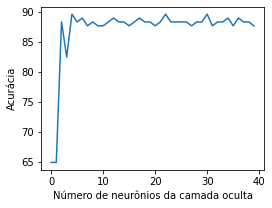

In [20]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(Max_Ac)
plt.xlabel("Número de neurônios da camada oculta")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos ", np.argmax(Max_Ac)+1, " neurônios na camada intermediaria")
print(Max_Ac)
neuron_hidden_layer = np.argmax(Max_Ac)+1

A partir de 5 neuronios na camada oculta já atingimos uma suficiente complexidade do modelo para termos resultados próximos à 90%

In [21]:
## training parameters
epochs=150
n_samples = 40
batch_size = np.linspace(1, n_samples, n_samples)
## model
D_hidden = np.linspace(1, n_samples, n_samples)
Max_Ac = np.zeros(n_samples)
D_in = 8
D_out= 1
D_hidden = neuron_hidden_layer
for i in range(n_samples):
    model = nn.Sequential(nn.Linear(D_in,D_hidden1),
                        nn.ReLU(),
                        nn.Linear(D_hidden1,D_out),
                        nn.Sigmoid())
    optimizer=th.optim.Adam(model.parameters(),lr=0.01)
    loss_fn=nn.BCELoss()
    labels, y_pred, Max_Ac[i] = train(model,optimizer,loss_fn,epochs,int(batch_size[i]),X_train,y_train,X_test,y_test)

---------- Best : 88.961  at epoch  144  /  150
---------- Best : 88.961  at epoch  99  /  150
---------- Best : 88.312  at epoch  41  /  150
---------- Best : 87.662  at epoch  24  /  150
---------- Best : 88.961  at epoch  107  /  150
---------- Best : 88.961  at epoch  60  /  150
---------- Best : 88.312  at epoch  51  /  150
---------- Best : 88.312  at epoch  41  /  150
---------- Best : 89.610  at epoch  104  /  150
---------- Best : 88.312  at epoch  58  /  150
---------- Best : 88.961  at epoch  99  /  150
---------- Best : 88.312  at epoch  58  /  150
---------- Best : 88.961  at epoch  106  /  150
---------- Best : 88.961  at epoch  116  /  150
---------- Best : 88.312  at epoch  30  /  150
---------- Best : 88.312  at epoch  70  /  150
---------- Best : 88.312  at epoch  89  /  150
---------- Best : 88.312  at epoch  61  /  150
---------- Best : 88.312  at epoch  46  /  150
---------- Best : 88.312  at epoch  86  /  150
---------- Best : 87.662  at epoch  34  /  150
--------

A acurácia max é 89.6103896103896 quando temos  9  batch_size


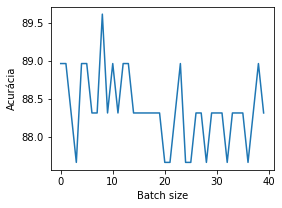

In [22]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(Max_Ac)
plt.xlabel("Batch size")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos ", np.argmax(Max_Ac)+1, " batch_size")
batch_optimal = np.argmax(Max_Ac)+1

In [23]:
## training parameters
epochs=150
batch_size = batch_optimal
print(batch_optimal)
n_samples = 100
lrate = np.linspace(0.1, 0.001, n_samples)
## model
Max_Ac = np.zeros(n_samples)
D_in = 8
D_out= 1
D_hidden = neuron_hidden_layer
for i in range(n_samples):
    model = nn.Sequential(nn.Linear(D_in,D_hidden1),
                        nn.ReLU(),
                        nn.Linear(D_hidden1,D_out),
                        nn.Sigmoid())
    optimizer=th.optim.Adam(model.parameters(), lr = lrate[i])
    loss_fn=nn.BCELoss()
    labels, y_pred, Max_Ac[i] = train(model,optimizer,loss_fn,epochs,batch_size,X_train,y_train,X_test,y_test)

9
---------- Best : 88.312  at epoch  34  /  150
---------- Best : 86.364  at epoch  33  /  150
---------- Best : 64.935  at epoch  0  /  150
---------- Best : 88.312  at epoch  27  /  150
---------- Best : 87.013  at epoch  25  /  150
---------- Best : 88.312  at epoch  108  /  150
---------- Best : 87.013  at epoch  90  /  150
---------- Best : 88.312  at epoch  19  /  150
---------- Best : 88.312  at epoch  22  /  150
---------- Best : 88.312  at epoch  52  /  150
---------- Best : 87.662  at epoch  54  /  150
---------- Best : 88.961  at epoch  76  /  150
---------- Best : 88.312  at epoch  39  /  150
---------- Best : 87.662  at epoch  13  /  150
---------- Best : 87.662  at epoch  19  /  150
---------- Best : 88.312  at epoch  109  /  150
---------- Best : 88.312  at epoch  64  /  150
---------- Best : 87.013  at epoch  70  /  150
---------- Best : 88.312  at epoch  40  /  150
---------- Best : 87.662  at epoch  32  /  150
---------- Best : 88.961  at epoch  129  /  150
---------

In [ ]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(Max_Ac)
plt.xlabel("Número de neurônios da camada oculta")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos ", np.argmax(Max_Ac)+1, " neurônios na camada intermediaria")
print(Max_Ac)
neuron_hidden_layer = np.argmax(Max_Ac)+1

A acurácia max é 88.96103896103897 quando temos lr =  0.08900000000000001


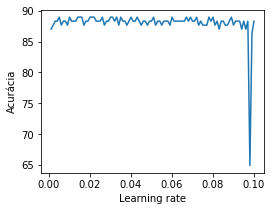

In [24]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(lrate, Max_Ac)
plt.xlabel("Learning rate")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos lr = ", lrate[np.argmax(Max_Ac)])
best_lr = lrate[np.argmax(Max_Ac)]

In [25]:
## best parameters
epochs=150
batch_size = batch_optimal
n_samples = 100
## model
D_in = 8
D_out= 1
D_hidden = neuron_hidden_layer
model = nn.Sequential(nn.Linear(D_in,D_hidden1),
                    nn.ReLU(),
                    nn.Linear(D_hidden1,D_out),
                    nn.Sigmoid())
optimizer=th.optim.Adam(model.parameters(), lr = best_lr)
loss_fn=nn.BCELoss()
labels, y_pred, Max_Ac[i] = train(model,optimizer,loss_fn,epochs,batch_size,X_train,y_train,X_test,y_test)

---------- Best : 87.013  at epoch  109  /  150


Note que a acurácia entre 87-90% está extremamente próxima (dado que cada amostra de teste representa aproximadamente 1,5%). Deste modo, notamos que a variação do batch size e do learning rate não trouxe grandes mudanças p convergência do modelo. No caso do learning rate, isso pode significar que todos os minimos da função custo são bem proximos (então o passo do aprendizado não é mt importante). No caso do batch size, o aumento dele trouxe apenas um diminuição no tempo de treinamento do modelo 

In [22]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(labels,y_pred)
display(confusion_matrix)

NameError: name 'labels' is not defined

### Exercício 2

In [10]:
# Importing from torchdivision and converting to the Tensor form

transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST(root=r'C:\Users\kaleb\Google Drive\UNICAMP\IA048\Labs\EFC3', download=False, train=True, transform=transform)
testset = datasets.MNIST(root=r'C:\Users\kaleb\Google Drive\UNICAMP\IA048\Labs\EFC3', download =False, train=False, transform=transform)

In [11]:
# Loading data
train = th.utils.data.DataLoader(trainset, batch_size=60000, shuffle=True)
test = th.utils.data.DataLoader(testset, batch_size=10000, shuffle=True)

In [12]:
# Iterating in the dataset so we can really catch the data
data_iter = iter(train)
data_iter2 = iter(test)
train_x, train_y = data_iter.next()
test_x, test_y = data_iter2.next()

In [13]:
display(train_x.shape)
display(train_y.shape)
display(test_x.shape)
display(test_y.shape)
trainconv_x = train_x.cuda()
trainconv_y = train_y.cuda()
testconv_x = test_x.cuda()
testconv_y = test_y.cuda()

torch.Size([60000, 1, 28, 28])

torch.Size([60000])

torch.Size([10000, 1, 28, 28])

torch.Size([10000])

In [14]:
# Fixing the shape of the tensor by squeezing the color dimensions (we have B and W images) and reshaping
train_x = th.squeeze(train_x)
test_x = th.squeeze(test_x)
train_x = th.reshape(train_x,(60000,784))
test_x = th.reshape(test_x,(10000,784))
display(train_x.shape)
display(test_x.shape)

torch.Size([60000, 784])

torch.Size([10000, 784])

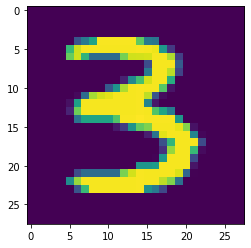

In [15]:
plt.imshow(train_x[20].numpy().reshape(28,28))
plt.show()

In [16]:
train_x = train_x.cuda()
train_y = train_y.cuda()
test_x = test_x.cuda()
test_y = test_y.cuda()

In [57]:
# Creating a function to train our model

def train(model, optimizer, loss_fn, epochs, batch_size, train_x, train_y, test_x, test_y, verbose=False):
    # Mini-batching and shuffling
    Ntrain = train_x.shape[0]
    Nvalid = test_x.shape[0]
    # Number of samples that we treat before updating the grading using SGD
    idx = np.arange(Ntrain)
    nbatch = int(Ntrain/batch_size)

    train_losses,valid_losses,valid_accuracies, y_pred = [],[],[], []
    for e in range(epochs):
        np.random.shuffle(idx)
        running_loss = 0
        totaln = 0
        for b in range(nbatch):
            ids = idx[b*batch_size:(b+1)*batch_size]
            images = train_x[ids]
            labels = train_y[ids]
            totaln = totaln + labels.shape[0] # Number of samples
            optimizer.zero_grad()
            logprobs = model(images)
            loss = loss_fn(logprobs, labels)
            loss.backward()
            optimizer.step()
            running_loss = running_loss + loss.item()
        # Training is over for ONE epoch
        accuracy = 0
        valid_loss = 0
        # The gradient is no more necessary from here, so we can increase the speed of our process by ignoring it
        with th.no_grad():
            images = test_x
            labels = test_y
            logprobs = model(images)
            valid_loss = loss_fn(logprobs, labels)
            top_p, top_class = logprobs.topk(1)
            # topk will take the predicted class with bigger logprobs value when we apply the softmax function
            accuracy = (top_class.T == labels).sum().float()
            train_losses.append(running_loss/batch_size)
            valid_losses.append(valid_loss)
            valid_accuracies.append(accuracy.item()*100/Nvalid)
            y_pred.append(top_class.T.squeeze().cpu())
    
        print("Epoch: {}\t".format(e),"train Loss: {:.5f}.. ".format(train_losses[-1]), "valid Loss: {:.5f}.. ".format(valid_losses[-1]),"valid Accuracy: {:.3f}".format(valid_accuracies[-1])) 
    print('Training/Validation done')
    print("---------- Best : {:.3f}".format(max(valid_accuracies)), " at epoch " , np.fromiter(valid_accuracies, dtype=np.float).argmax(), " / ",epochs )

    return y_pred, max(valid_accuracies), np.fromiter(valid_accuracies, dtype=np.float).argmax()




In [77]:
## one hidden layer -> trying to find the optimal number of neurons
epochs= 20
batch_size = 50
n_samples = 20
Max_Ac = np.zeros(n_samples)
epoch = np.zeros(n_samples)

D_in = 784
D_out= 10
D_hidden = np.linspace(10, 200, n_samples)

for k in range(n_samples):
    D_hidden_idx = int(D_hidden[k])
    model = nn.Sequential(nn.Linear(D_in,D_hidden_idx),
                    nn.ReLU(),
                    nn.Linear(D_hidden_idx,D_out),
                    nn.LogSoftmax(dim=1)).cuda()
    optimizer=th.optim.Adam(model.parameters(), lr = 0.005)
    loss_fn=nn.NLLLoss()
    y_pred, Max_Ac[k], epoch[k] = train(model, optimizer, loss_fn, epochs, batch_size, train_x, train_y, test_x, test_y)

raining/Validation done
---------- Best : 97.480  at epoch  8  /  20
Epoch: 0	 train Loss: 5.44483..  valid Loss: 0.12618..  valid Accuracy: 96.030
Epoch: 1	 train Loss: 2.66314..  valid Loss: 0.12481..  valid Accuracy: 96.050
Epoch: 2	 train Loss: 2.04816..  valid Loss: 0.10757..  valid Accuracy: 96.920
Epoch: 3	 train Loss: 1.74942..  valid Loss: 0.10173..  valid Accuracy: 97.210
Epoch: 4	 train Loss: 1.52135..  valid Loss: 0.13339..  valid Accuracy: 96.200
Epoch: 5	 train Loss: 1.30710..  valid Loss: 0.12818..  valid Accuracy: 96.940
Epoch: 6	 train Loss: 1.24339..  valid Loss: 0.11666..  valid Accuracy: 97.260
Epoch: 7	 train Loss: 1.21390..  valid Loss: 0.15772..  valid Accuracy: 96.350
Epoch: 8	 train Loss: 1.03582..  valid Loss: 0.14265..  valid Accuracy: 96.890
Epoch: 9	 train Loss: 0.95555..  valid Loss: 0.13228..  valid Accuracy: 97.370
Epoch: 10	 train Loss: 0.95897..  valid Loss: 0.15082..  valid Accuracy: 97.430
Epoch: 11	 train Loss: 0.83416..  valid Loss: 0.17001..  vali

A acurácia max é 97.91 quando temos  170  neurônios na camada intermediaria


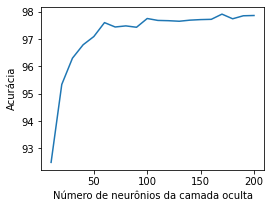

In [78]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(D_hidden,Max_Ac)
plt.xlabel("Número de neurônios da camada oculta")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos ", 10*(np.argmax(Max_Ac)+1), " neurônios na camada intermediaria")
neuron_hidden_layer = np.argmax(Max_Ac)+1


Let's use 100 neurons because it seems reasonable

In [79]:
display(D_hidden[9])
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_y.cpu(),y_pred[9])
display(confusion_matrix)

100.0

array([[ 965,    1,    1,    0,    0,    1,    6,    1,    1,    4],
       [   0, 1125,    4,    0,    0,    1,    1,    0,    4,    0],
       [   1,    1, 1008,    3,    6,    1,    3,    4,    5,    0],
       [   1,    1,    6,  974,    1,   10,    0,    6,   11,    0],
       [   1,    0,    2,    0,  965,    0,    3,    0,    1,   10],
       [   2,    1,    0,    8,    1,  851,    5,    4,   16,    4],
       [   2,    4,    3,    0,    9,    2,  932,    0,    6,    0],
       [   1,    5,    9,    2,    0,    0,    0,  999,    5,    7],
       [   5,    0,    5,    4,    1,    1,    1,    2,  953,    2],
       [   1,    3,    0,    7,    9,    2,    1,    5,   11,  970]],
      dtype=int64)

Text(0.5, 15.0, 'Predicted label')

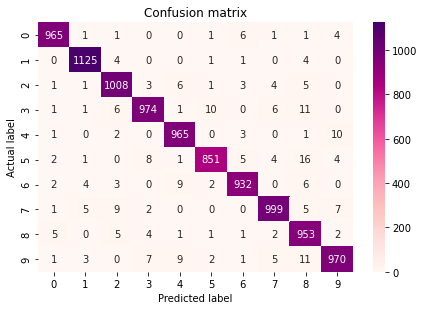

In [80]:
# Confusion matrix for D_hidden = 150
class_names = ["0","1","2","3","4","5","6","8","9"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Creating a visual confusion matrix in a heatmap form
sns.heatmap(pd.DataFrame(confusion_matrix), cmap="RdPu", annot=True,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

EXPECTED VALUE:  3  PREDICTED VALUE:  8


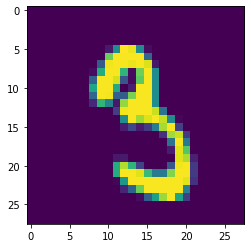

EXPECTED VALUE:  7  PREDICTED VALUE:  3


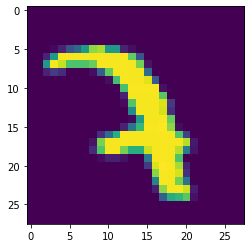

EXPECTED VALUE:  0  PREDICTED VALUE:  6


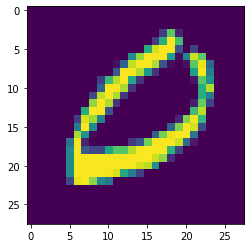

EXPECTED VALUE:  9  PREDICTED VALUE:  3


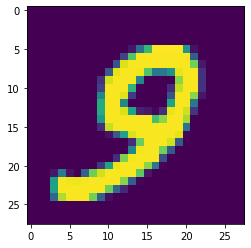

EXPECTED VALUE:  2  PREDICTED VALUE:  6


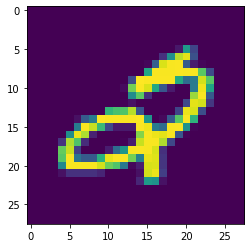

EXPECTED VALUE:  5  PREDICTED VALUE:  6


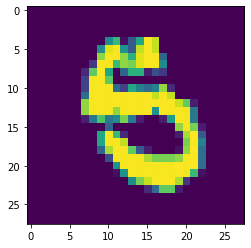

EXPECTED VALUE:  0  PREDICTED VALUE:  6


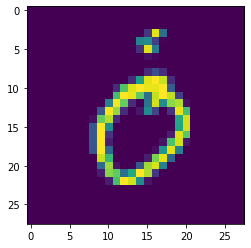

EXPECTED VALUE:  0  PREDICTED VALUE:  6


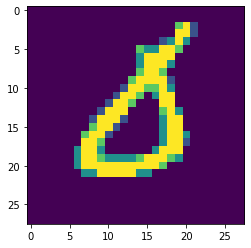

EXPECTED VALUE:  0  PREDICTED VALUE:  5


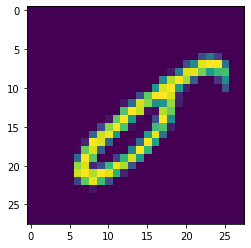

EXPECTED VALUE:  3  PREDICTED VALUE:  8


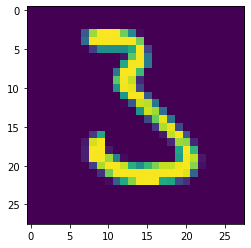

EXPECTED VALUE:  3  PREDICTED VALUE:  8


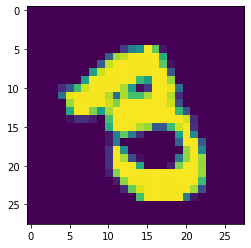

EXPECTED VALUE:  6  PREDICTED VALUE:  4


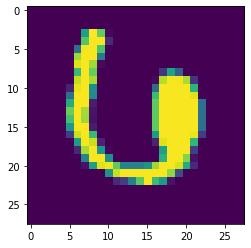

EXPECTED VALUE:  6  PREDICTED VALUE:  4


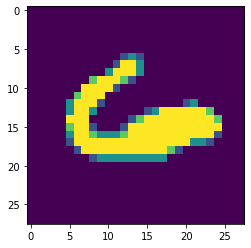

EXPECTED VALUE:  5  PREDICTED VALUE:  8


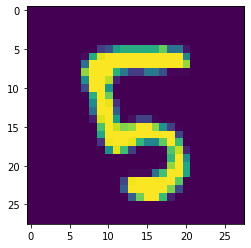

EXPECTED VALUE:  5  PREDICTED VALUE:  7


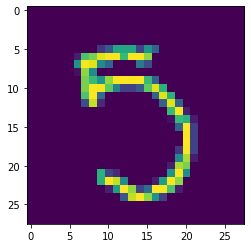

EXPECTED VALUE:  0  PREDICTED VALUE:  9


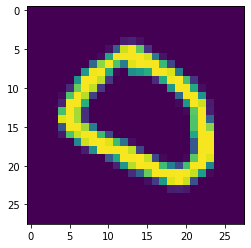

EXPECTED VALUE:  5  PREDICTED VALUE:  6


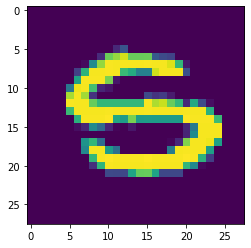

EXPECTED VALUE:  6  PREDICTED VALUE:  8


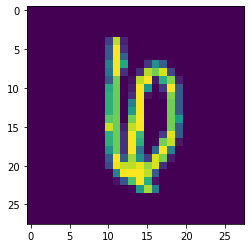

EXPECTED VALUE:  9  PREDICTED VALUE:  4


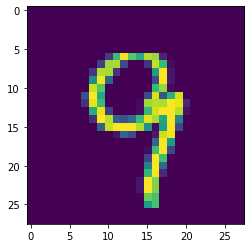

EXPECTED VALUE:  1  PREDICTED VALUE:  5


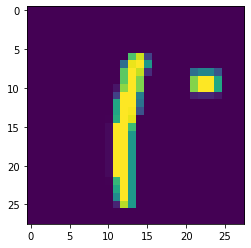

EXPECTED VALUE:  9  PREDICTED VALUE:  3


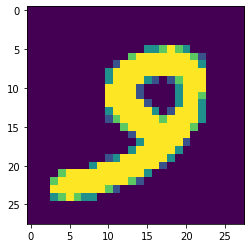

EXPECTED VALUE:  1  PREDICTED VALUE:  6


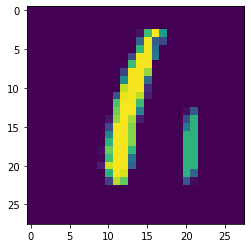

EXPECTED VALUE:  5  PREDICTED VALUE:  3


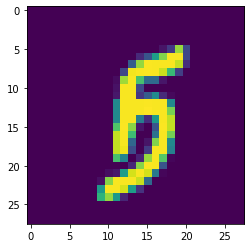

EXPECTED VALUE:  9  PREDICTED VALUE:  8


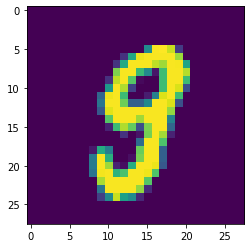

EXPECTED VALUE:  4  PREDICTED VALUE:  0


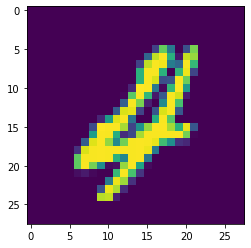

EXPECTED VALUE:  5  PREDICTED VALUE:  8


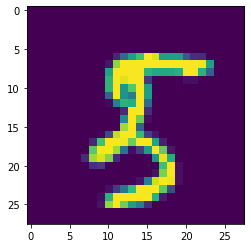

EXPECTED VALUE:  5  PREDICTED VALUE:  8


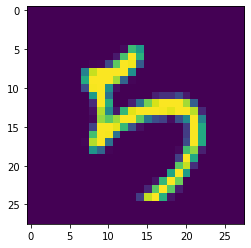

EXPECTED VALUE:  9  PREDICTED VALUE:  4


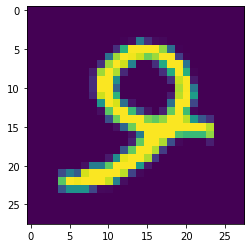

EXPECTED VALUE:  2  PREDICTED VALUE:  4


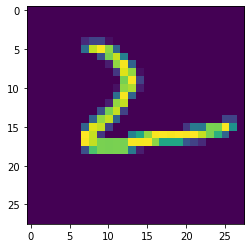

EXPECTED VALUE:  8  PREDICTED VALUE:  2


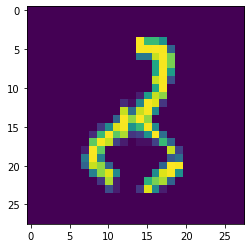

EXPECTED VALUE:  6  PREDICTED VALUE:  8


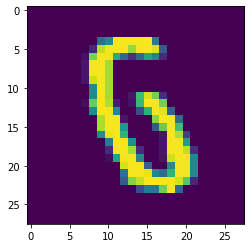

EXPECTED VALUE:  9  PREDICTED VALUE:  7


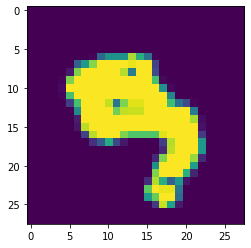

EXPECTED VALUE:  1  PREDICTED VALUE:  2


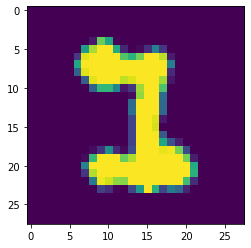

EXPECTED VALUE:  6  PREDICTED VALUE:  1


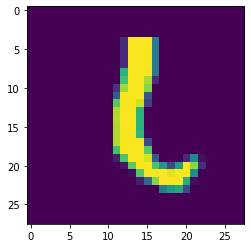

EXPECTED VALUE:  4  PREDICTED VALUE:  9


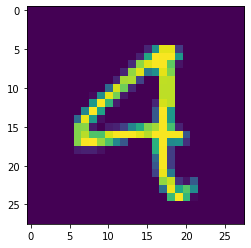

EXPECTED VALUE:  9  PREDICTED VALUE:  8


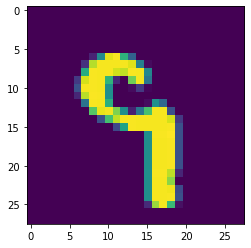

EXPECTED VALUE:  5  PREDICTED VALUE:  3


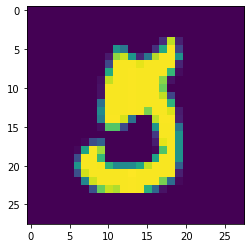

EXPECTED VALUE:  0  PREDICTED VALUE:  1


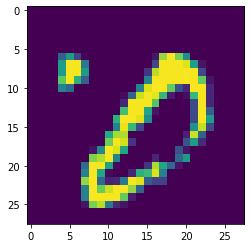

EXPECTED VALUE:  5  PREDICTED VALUE:  3


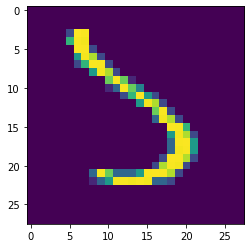

EXPECTED VALUE:  7  PREDICTED VALUE:  2


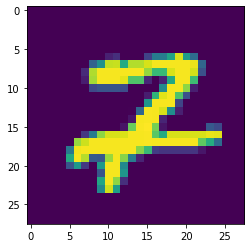

EXPECTED VALUE:  9  PREDICTED VALUE:  3


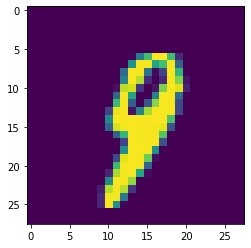

EXPECTED VALUE:  5  PREDICTED VALUE:  7


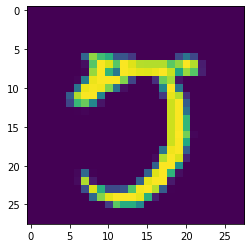

EXPECTED VALUE:  5  PREDICTED VALUE:  9


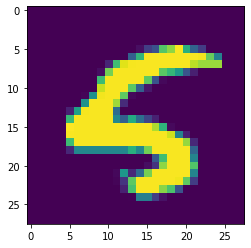

EXPECTED VALUE:  3  PREDICTED VALUE:  8


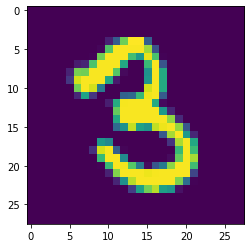

EXPECTED VALUE:  5  PREDICTED VALUE:  9


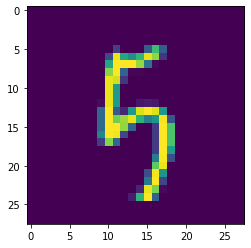

EXPECTED VALUE:  4  PREDICTED VALUE:  9


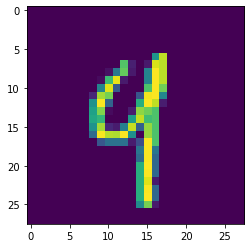

EXPECTED VALUE:  9  PREDICTED VALUE:  3


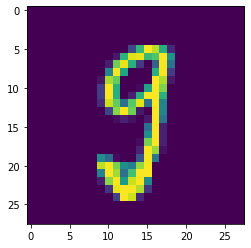

EXPECTED VALUE:  5  PREDICTED VALUE:  1


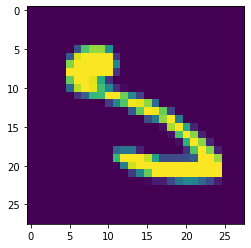

EXPECTED VALUE:  9  PREDICTED VALUE:  4


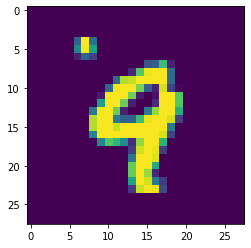

EXPECTED VALUE:  9  PREDICTED VALUE:  4


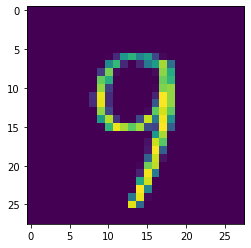

EXPECTED VALUE:  8  PREDICTED VALUE:  0


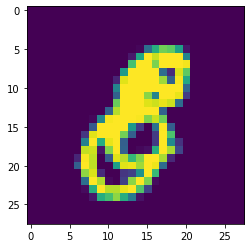

EXPECTED VALUE:  6  PREDICTED VALUE:  4


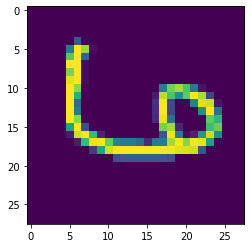

EXPECTED VALUE:  5  PREDICTED VALUE:  8


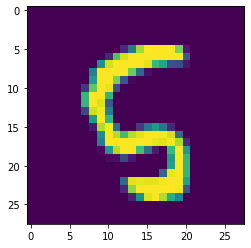

EXPECTED VALUE:  2  PREDICTED VALUE:  8


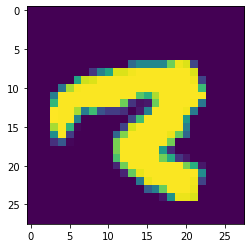

EXPECTED VALUE:  5  PREDICTED VALUE:  3


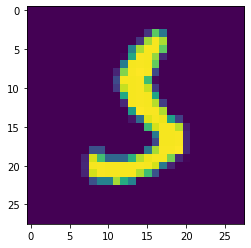

EXPECTED VALUE:  8  PREDICTED VALUE:  0


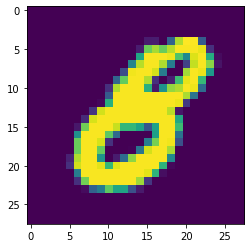

EXPECTED VALUE:  3  PREDICTED VALUE:  2


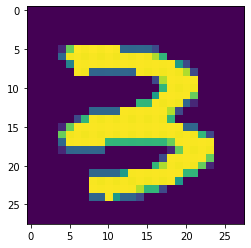

EXPECTED VALUE:  8  PREDICTED VALUE:  2


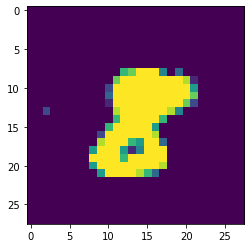

EXPECTED VALUE:  9  PREDICTED VALUE:  3


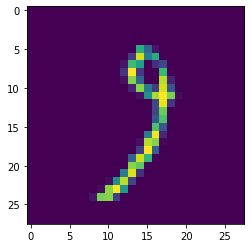

EXPECTED VALUE:  2  PREDICTED VALUE:  1


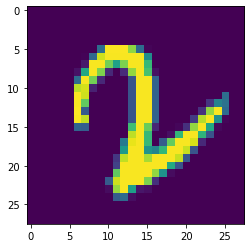

EXPECTED VALUE:  5  PREDICTED VALUE:  8


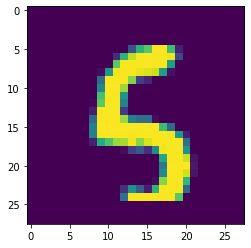

EXPECTED VALUE:  6  PREDICTED VALUE:  8


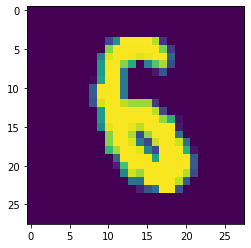

EXPECTED VALUE:  2  PREDICTED VALUE:  4


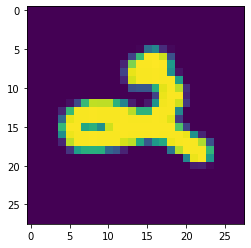

EXPECTED VALUE:  6  PREDICTED VALUE:  2


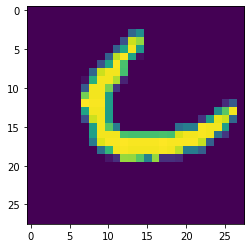

EXPECTED VALUE:  0  PREDICTED VALUE:  8


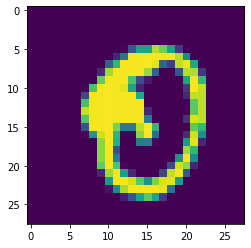

EXPECTED VALUE:  5  PREDICTED VALUE:  6


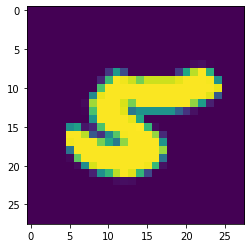

EXPECTED VALUE:  9  PREDICTED VALUE:  3


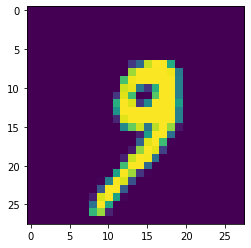

EXPECTED VALUE:  3  PREDICTED VALUE:  8


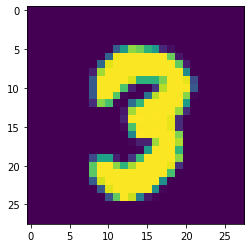

EXPECTED VALUE:  2  PREDICTED VALUE:  6


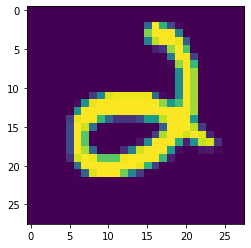

EXPECTED VALUE:  6  PREDICTED VALUE:  4


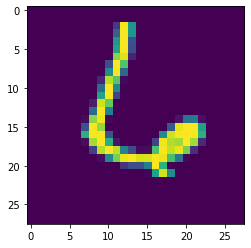

EXPECTED VALUE:  4  PREDICTED VALUE:  9


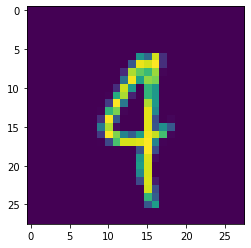

EXPECTED VALUE:  6  PREDICTED VALUE:  4


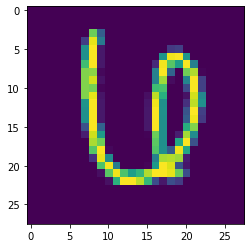

EXPECTED VALUE:  7  PREDICTED VALUE:  9


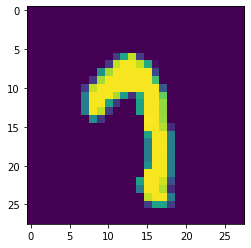

EXPECTED VALUE:  9  PREDICTED VALUE:  7


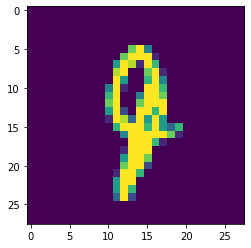

EXPECTED VALUE:  4  PREDICTED VALUE:  6


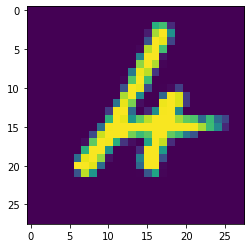

EXPECTED VALUE:  9  PREDICTED VALUE:  4


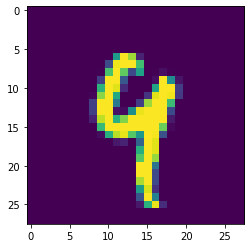

EXPECTED VALUE:  7  PREDICTED VALUE:  2


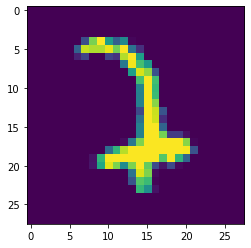

EXPECTED VALUE:  1  PREDICTED VALUE:  2


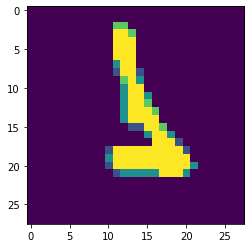

EXPECTED VALUE:  8  PREDICTED VALUE:  2


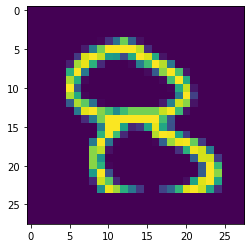

EXPECTED VALUE:  4  PREDICTED VALUE:  9


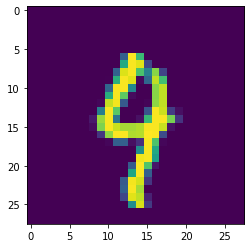

EXPECTED VALUE:  3  PREDICTED VALUE:  2


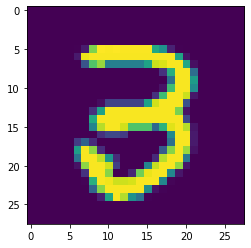

EXPECTED VALUE:  8  PREDICTED VALUE:  9


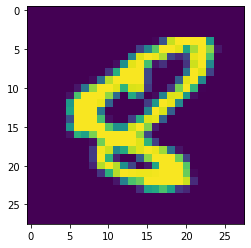

EXPECTED VALUE:  7  PREDICTED VALUE:  8


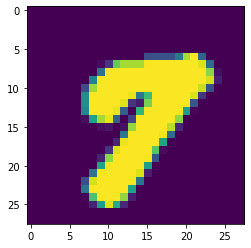

EXPECTED VALUE:  2  PREDICTED VALUE:  4


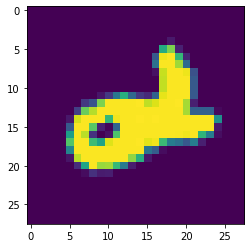

EXPECTED VALUE:  9  PREDICTED VALUE:  1


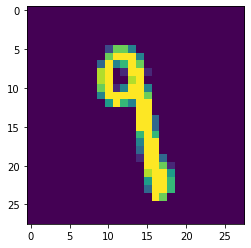

EXPECTED VALUE:  4  PREDICTED VALUE:  6


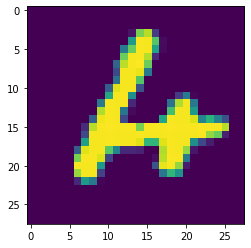

EXPECTED VALUE:  3  PREDICTED VALUE:  5


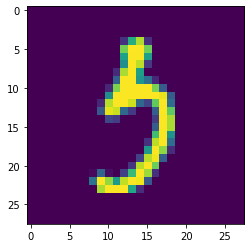

EXPECTED VALUE:  6  PREDICTED VALUE:  4


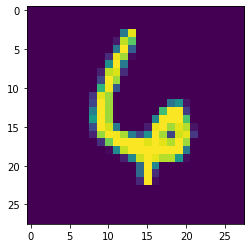

EXPECTED VALUE:  6  PREDICTED VALUE:  2


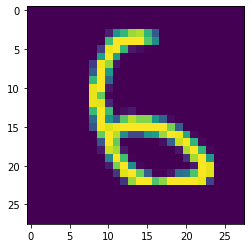

EXPECTED VALUE:  9  PREDICTED VALUE:  7


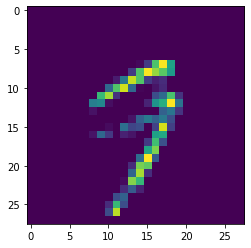

EXPECTED VALUE:  6  PREDICTED VALUE:  8


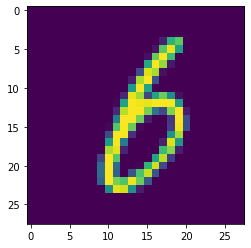

EXPECTED VALUE:  5  PREDICTED VALUE:  8


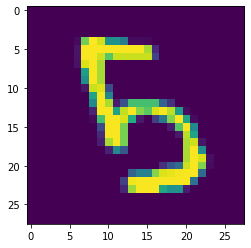

EXPECTED VALUE:  9  PREDICTED VALUE:  4


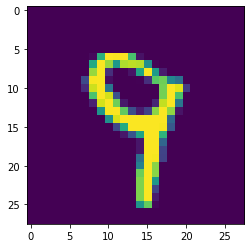

EXPECTED VALUE:  4  PREDICTED VALUE:  9


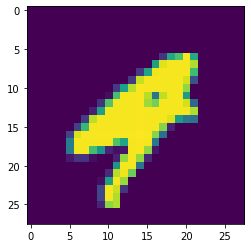

EXPECTED VALUE:  7  PREDICTED VALUE:  3


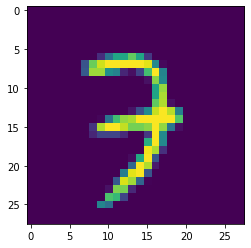

EXPECTED VALUE:  2  PREDICTED VALUE:  6


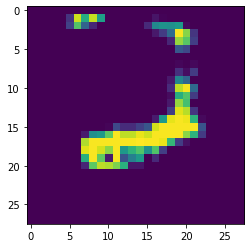

EXPECTED VALUE:  0  PREDICTED VALUE:  9


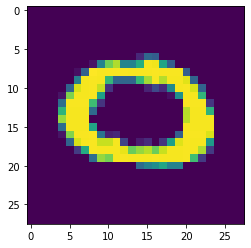

EXPECTED VALUE:  3  PREDICTED VALUE:  8


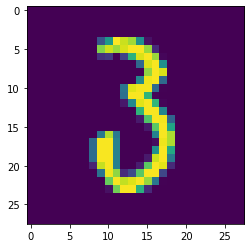

EXPECTED VALUE:  3  PREDICTED VALUE:  5


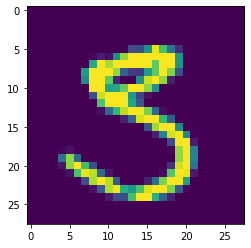

EXPECTED VALUE:  3  PREDICTED VALUE:  5


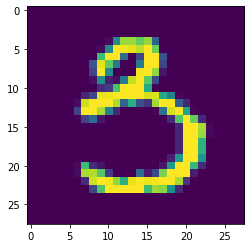

EXPECTED VALUE:  6  PREDICTED VALUE:  0


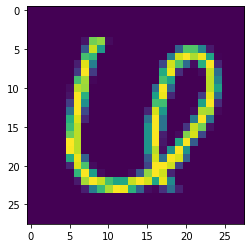

EXPECTED VALUE:  7  PREDICTED VALUE:  8


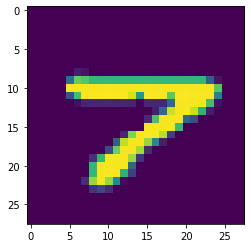

EXPECTED VALUE:  3  PREDICTED VALUE:  2


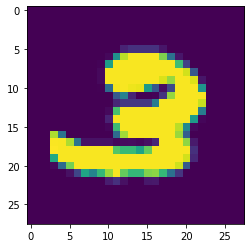

EXPECTED VALUE:  7  PREDICTED VALUE:  2


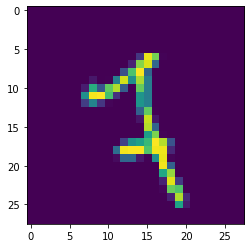

EXPECTED VALUE:  5  PREDICTED VALUE:  0


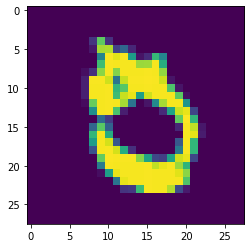

EXPECTED VALUE:  3  PREDICTED VALUE:  1


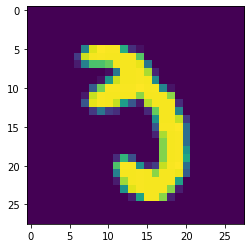

EXPECTED VALUE:  4  PREDICTED VALUE:  6


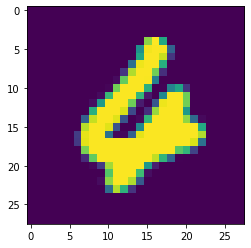

EXPECTED VALUE:  8  PREDICTED VALUE:  6


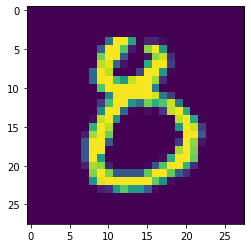

EXPECTED VALUE:  7  PREDICTED VALUE:  8


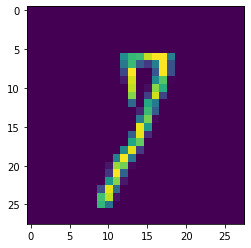

EXPECTED VALUE:  0  PREDICTED VALUE:  7


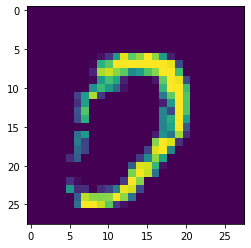

EXPECTED VALUE:  3  PREDICTED VALUE:  5


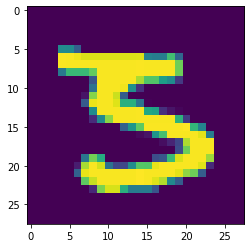

EXPECTED VALUE:  3  PREDICTED VALUE:  7


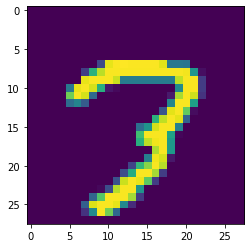

EXPECTED VALUE:  3  PREDICTED VALUE:  8


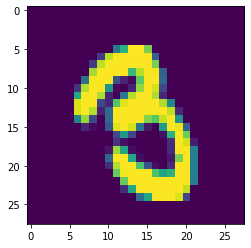

EXPECTED VALUE:  2  PREDICTED VALUE:  4


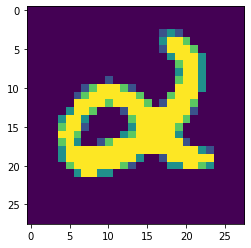

EXPECTED VALUE:  0  PREDICTED VALUE:  2


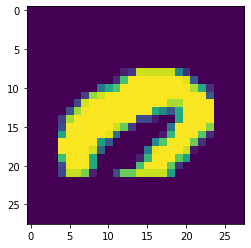

EXPECTED VALUE:  5  PREDICTED VALUE:  7


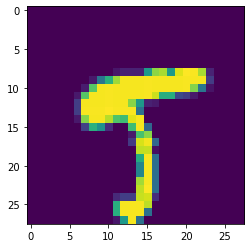

EXPECTED VALUE:  3  PREDICTED VALUE:  7


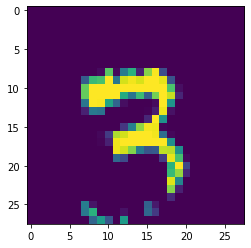

EXPECTED VALUE:  7  PREDICTED VALUE:  8


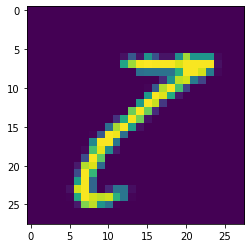

EXPECTED VALUE:  7  PREDICTED VALUE:  0


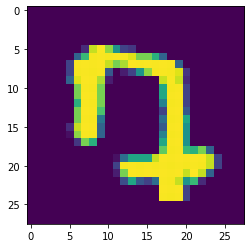

EXPECTED VALUE:  7  PREDICTED VALUE:  2


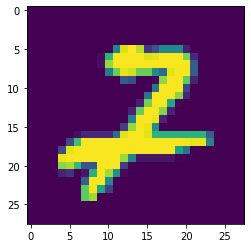

EXPECTED VALUE:  3  PREDICTED VALUE:  5


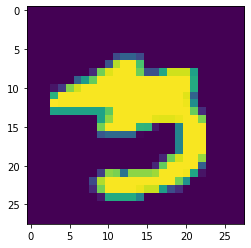

EXPECTED VALUE:  9  PREDICTED VALUE:  1


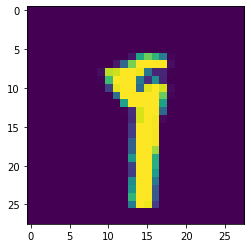

EXPECTED VALUE:  2  PREDICTED VALUE:  3


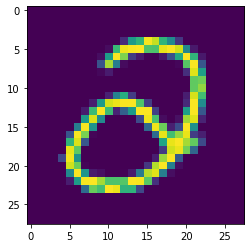

EXPECTED VALUE:  7  PREDICTED VALUE:  8


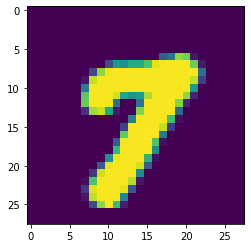

EXPECTED VALUE:  8  PREDICTED VALUE:  7


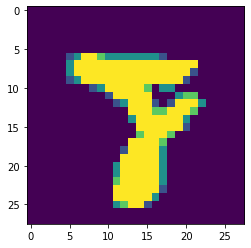

EXPECTED VALUE:  2  PREDICTED VALUE:  8


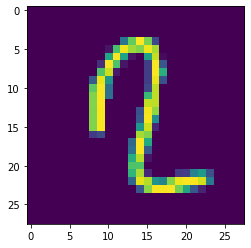

EXPECTED VALUE:  6  PREDICTED VALUE:  4


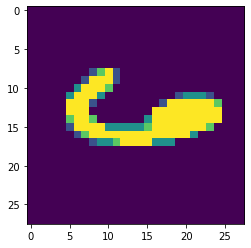

EXPECTED VALUE:  7  PREDICTED VALUE:  9


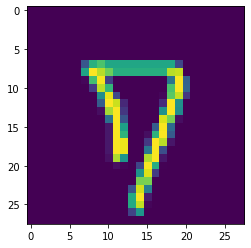

EXPECTED VALUE:  7  PREDICTED VALUE:  2


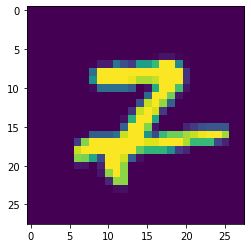

EXPECTED VALUE:  9  PREDICTED VALUE:  4


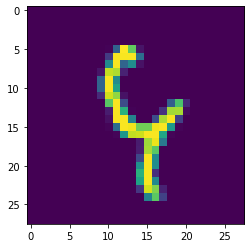

EXPECTED VALUE:  3  PREDICTED VALUE:  2


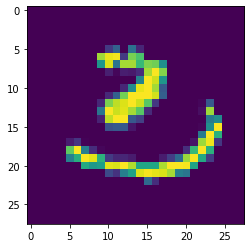

EXPECTED VALUE:  6  PREDICTED VALUE:  8


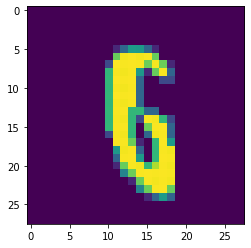

EXPECTED VALUE:  4  PREDICTED VALUE:  2


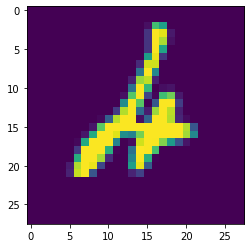

EXPECTED VALUE:  5  PREDICTED VALUE:  8


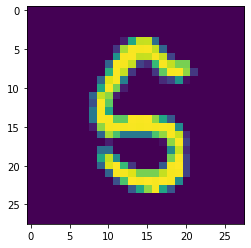

EXPECTED VALUE:  6  PREDICTED VALUE:  2


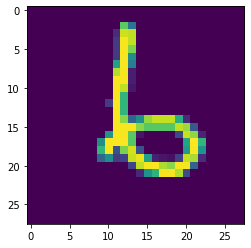

EXPECTED VALUE:  7  PREDICTED VALUE:  1


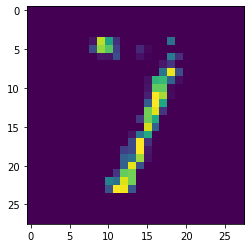

EXPECTED VALUE:  8  PREDICTED VALUE:  0


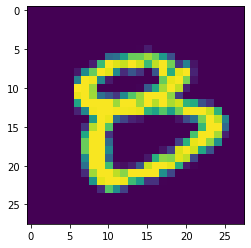

EXPECTED VALUE:  2  PREDICTED VALUE:  8


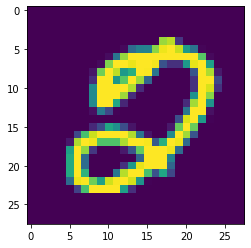

EXPECTED VALUE:  8  PREDICTED VALUE:  5


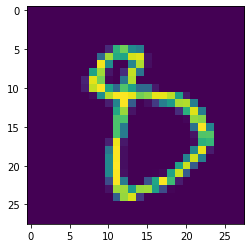

EXPECTED VALUE:  8  PREDICTED VALUE:  9


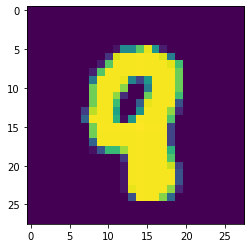

EXPECTED VALUE:  6  PREDICTED VALUE:  4


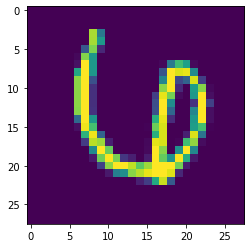

EXPECTED VALUE:  1  PREDICTED VALUE:  8


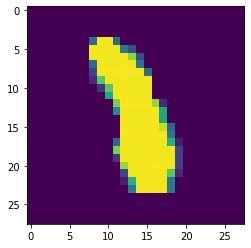

EXPECTED VALUE:  8  PREDICTED VALUE:  3


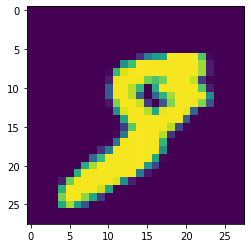

EXPECTED VALUE:  2  PREDICTED VALUE:  3


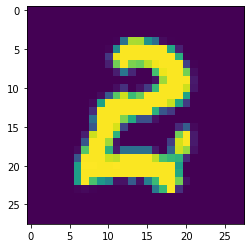

EXPECTED VALUE:  7  PREDICTED VALUE:  2


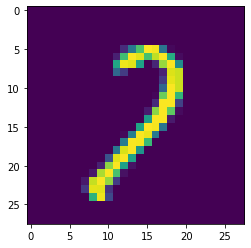

EXPECTED VALUE:  2  PREDICTED VALUE:  0


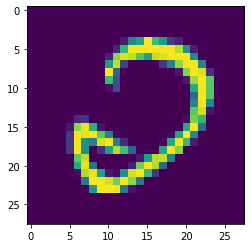

EXPECTED VALUE:  8  PREDICTED VALUE:  0


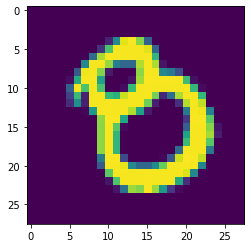

EXPECTED VALUE:  3  PREDICTED VALUE:  8


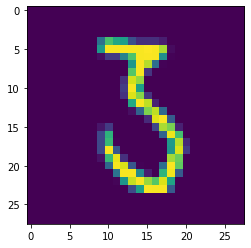

EXPECTED VALUE:  7  PREDICTED VALUE:  1


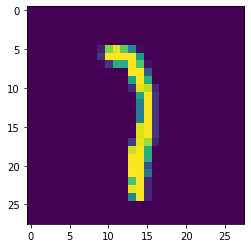

EXPECTED VALUE:  2  PREDICTED VALUE:  8


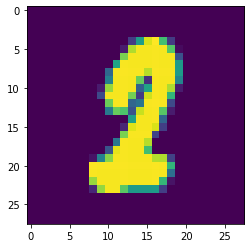

EXPECTED VALUE:  9  PREDICTED VALUE:  4


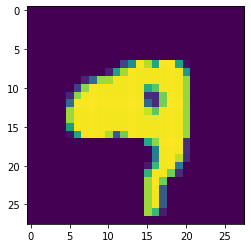

EXPECTED VALUE:  3  PREDICTED VALUE:  5


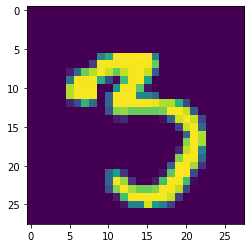

EXPECTED VALUE:  9  PREDICTED VALUE:  5


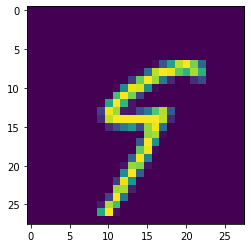

EXPECTED VALUE:  9  PREDICTED VALUE:  6


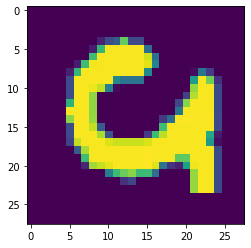

EXPECTED VALUE:  5  PREDICTED VALUE:  9


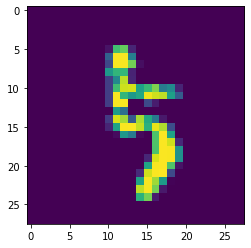

EXPECTED VALUE:  3  PREDICTED VALUE:  7


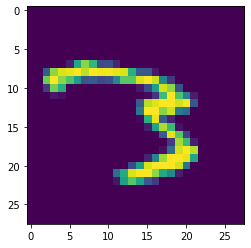

EXPECTED VALUE:  9  PREDICTED VALUE:  8


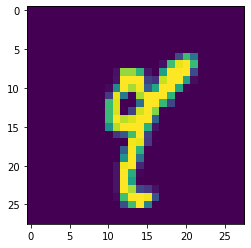

EXPECTED VALUE:  9  PREDICTED VALUE:  5


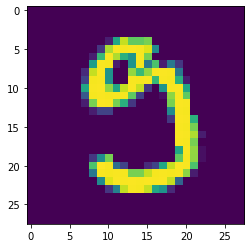

EXPECTED VALUE:  5  PREDICTED VALUE:  8


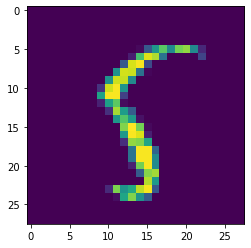

EXPECTED VALUE:  8  PREDICTED VALUE:  3


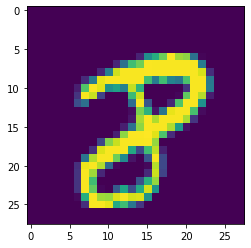

EXPECTED VALUE:  3  PREDICTED VALUE:  0


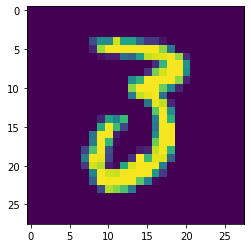

EXPECTED VALUE:  2  PREDICTED VALUE:  7


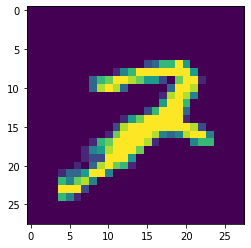

EXPECTED VALUE:  0  PREDICTED VALUE:  9


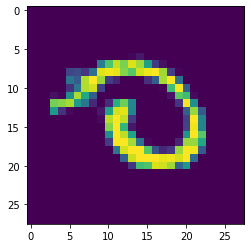

EXPECTED VALUE:  5  PREDICTED VALUE:  8


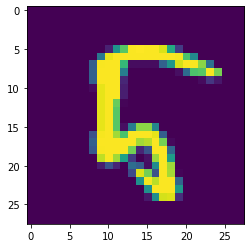

EXPECTED VALUE:  3  PREDICTED VALUE:  7


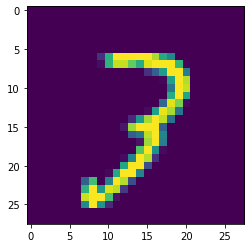

EXPECTED VALUE:  7  PREDICTED VALUE:  2


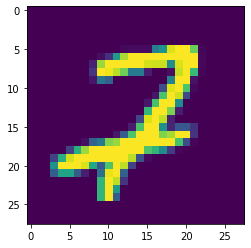

EXPECTED VALUE:  5  PREDICTED VALUE:  3


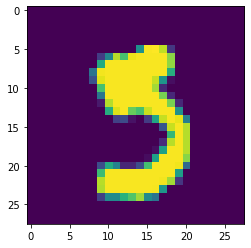

EXPECTED VALUE:  7  PREDICTED VALUE:  9


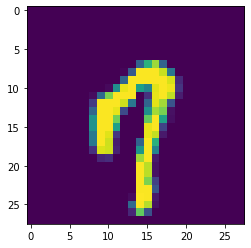

EXPECTED VALUE:  9  PREDICTED VALUE:  7


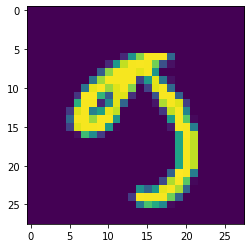

EXPECTED VALUE:  2  PREDICTED VALUE:  5


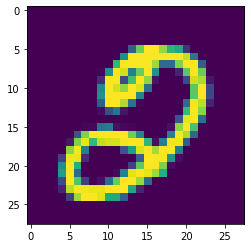

EXPECTED VALUE:  2  PREDICTED VALUE:  3


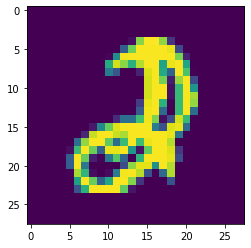

EXPECTED VALUE:  9  PREDICTED VALUE:  8


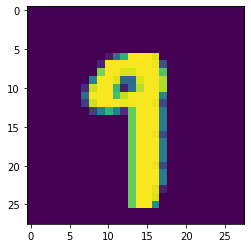

EXPECTED VALUE:  5  PREDICTED VALUE:  8


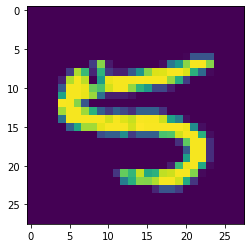

EXPECTED VALUE:  9  PREDICTED VALUE:  8


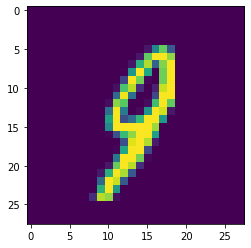

EXPECTED VALUE:  4  PREDICTED VALUE:  2


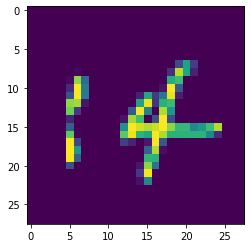

EXPECTED VALUE:  3  PREDICTED VALUE:  5


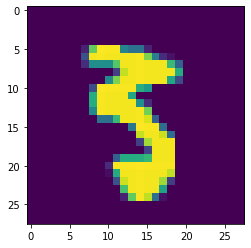

EXPECTED VALUE:  6  PREDICTED VALUE:  1


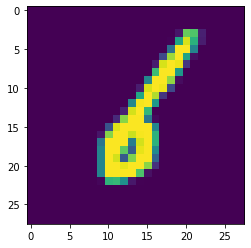

EXPECTED VALUE:  1  PREDICTED VALUE:  8


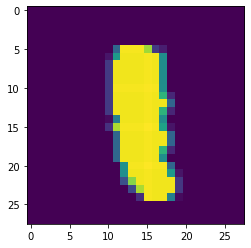

EXPECTED VALUE:  0  PREDICTED VALUE:  6


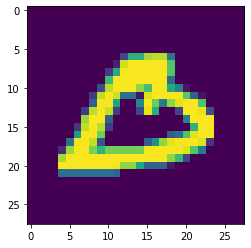

EXPECTED VALUE:  3  PREDICTED VALUE:  2


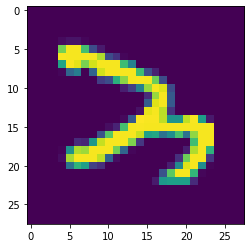

EXPECTED VALUE:  4  PREDICTED VALUE:  9


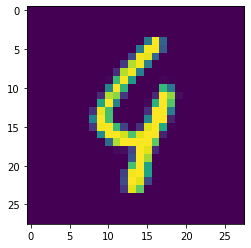

EXPECTED VALUE:  4  PREDICTED VALUE:  9


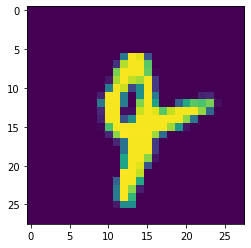

EXPECTED VALUE:  9  PREDICTED VALUE:  8


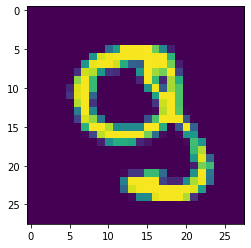

EXPECTED VALUE:  3  PREDICTED VALUE:  5


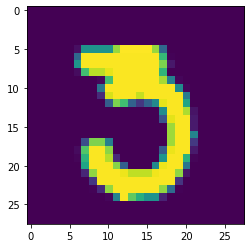

EXPECTED VALUE:  5  PREDICTED VALUE:  8


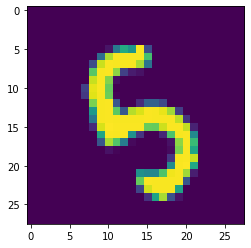

EXPECTED VALUE:  7  PREDICTED VALUE:  1


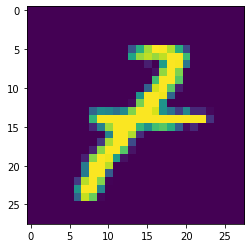

EXPECTED VALUE:  2  PREDICTED VALUE:  4


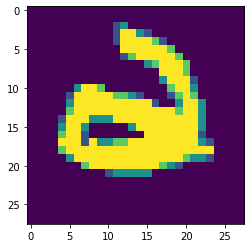

EXPECTED VALUE:  0  PREDICTED VALUE:  6


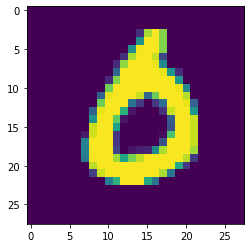

EXPECTED VALUE:  2  PREDICTED VALUE:  7


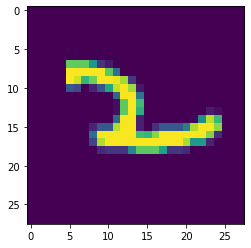

EXPECTED VALUE:  8  PREDICTED VALUE:  3


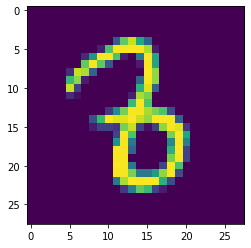

EXPECTED VALUE:  9  PREDICTED VALUE:  3


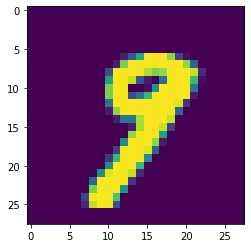

EXPECTED VALUE:  4  PREDICTED VALUE:  9


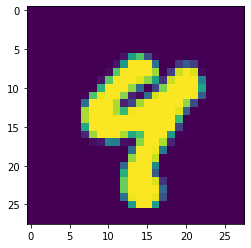

EXPECTED VALUE:  4  PREDICTED VALUE:  9


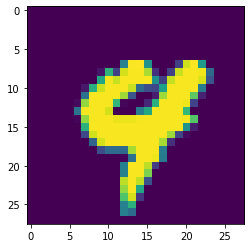

EXPECTED VALUE:  1  PREDICTED VALUE:  2


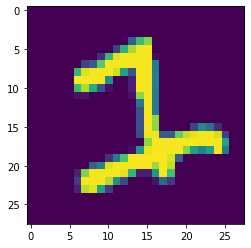

EXPECTED VALUE:  8  PREDICTED VALUE:  4


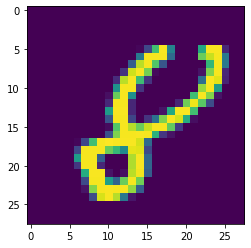

EXPECTED VALUE:  2  PREDICTED VALUE:  7


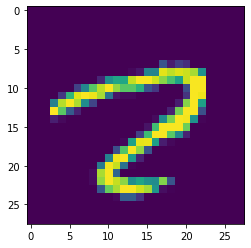

EXPECTED VALUE:  6  PREDICTED VALUE:  4


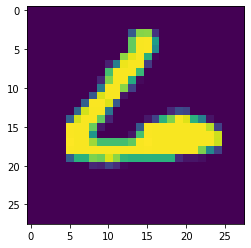

EXPECTED VALUE:  0  PREDICTED VALUE:  9


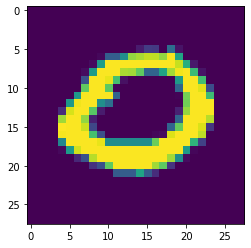

EXPECTED VALUE:  8  PREDICTED VALUE:  2


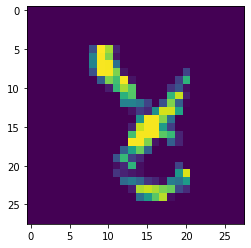

EXPECTED VALUE:  8  PREDICTED VALUE:  7


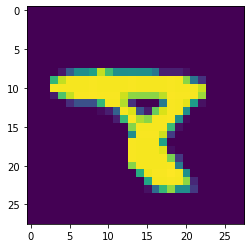

EXPECTED VALUE:  5  PREDICTED VALUE:  9


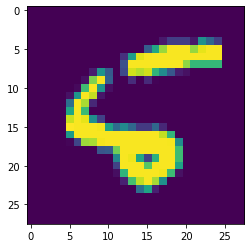

EXPECTED VALUE:  3  PREDICTED VALUE:  7


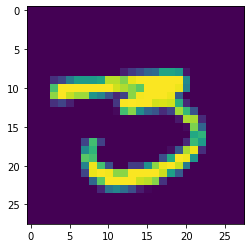

EXPECTED VALUE:  5  PREDICTED VALUE:  3


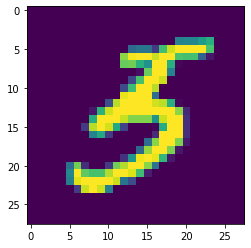

EXPECTED VALUE:  5  PREDICTED VALUE:  4


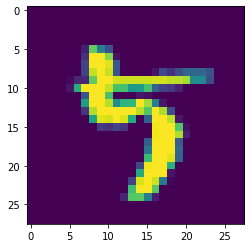

EXPECTED VALUE:  8  PREDICTED VALUE:  0


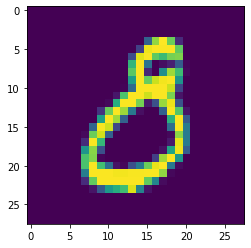

EXPECTED VALUE:  5  PREDICTED VALUE:  8


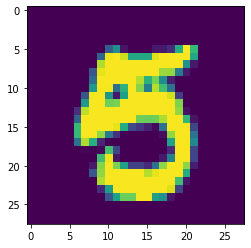

EXPECTED VALUE:  5  PREDICTED VALUE:  8


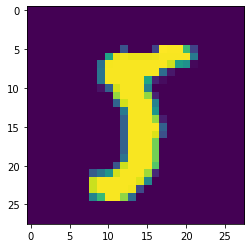

EXPECTED VALUE:  6  PREDICTED VALUE:  8


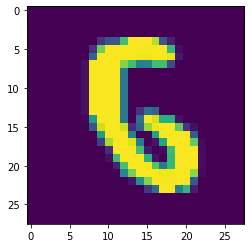

EXPECTED VALUE:  0  PREDICTED VALUE:  6


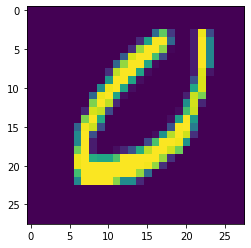

EXPECTED VALUE:  9  PREDICTED VALUE:  7


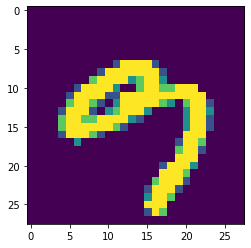

EXPECTED VALUE:  5  PREDICTED VALUE:  6


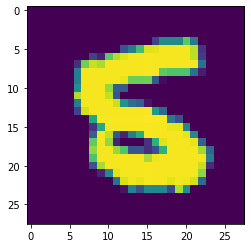

EXPECTED VALUE:  7  PREDICTED VALUE:  9


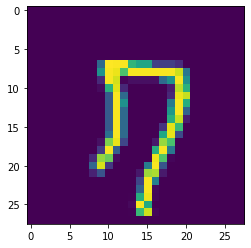

EXPECTED VALUE:  9  PREDICTED VALUE:  8


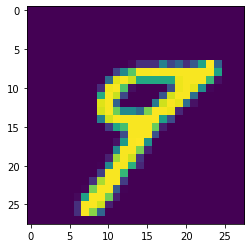

EXPECTED VALUE:  1  PREDICTED VALUE:  8


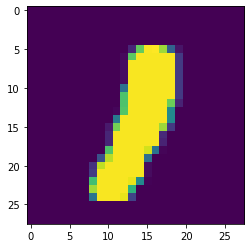

EXPECTED VALUE:  2  PREDICTED VALUE:  4


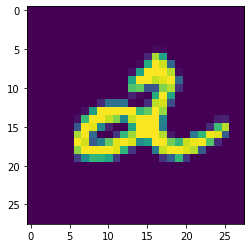

EXPECTED VALUE:  2  PREDICTED VALUE:  7


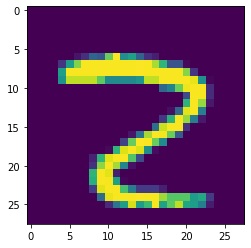

EXPECTED VALUE:  9  PREDICTED VALUE:  8


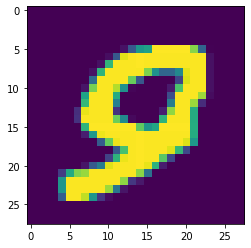

EXPECTED VALUE:  4  PREDICTED VALUE:  8


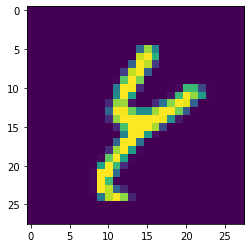

EXPECTED VALUE:  5  PREDICTED VALUE:  8


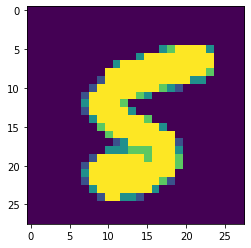

EXPECTED VALUE:  7  PREDICTED VALUE:  2


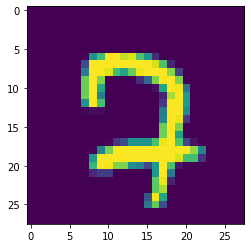

EXPECTED VALUE:  3  PREDICTED VALUE:  8


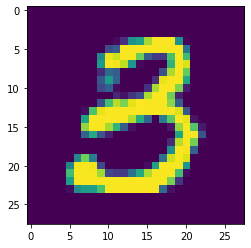

EXPECTED VALUE:  5  PREDICTED VALUE:  6


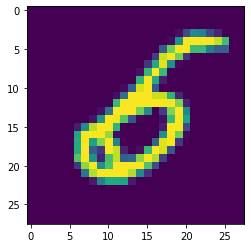

EXPECTED VALUE:  7  PREDICTED VALUE:  9


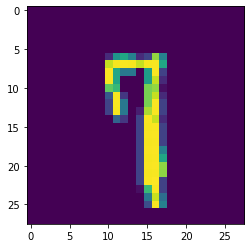

EXPECTED VALUE:  8  PREDICTED VALUE:  3


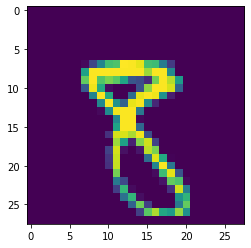

EXPECTED VALUE:  7  PREDICTED VALUE:  9


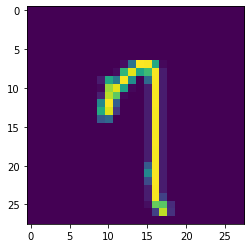

EXPECTED VALUE:  5  PREDICTED VALUE:  8


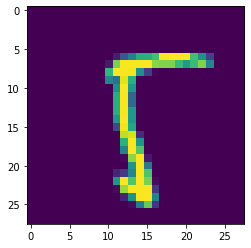

EXPECTED VALUE:  3  PREDICTED VALUE:  8


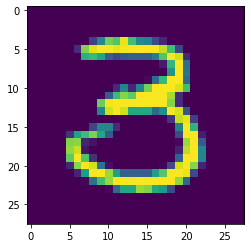

EXPECTED VALUE:  6  PREDICTED VALUE:  0


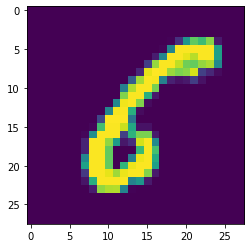

EXPECTED VALUE:  4  PREDICTED VALUE:  9


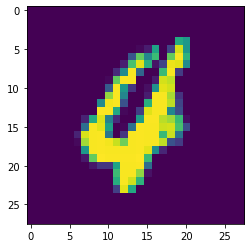

EXPECTED VALUE:  3  PREDICTED VALUE:  5


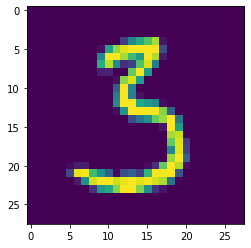

EXPECTED VALUE:  3  PREDICTED VALUE:  4


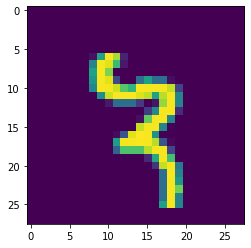

EXPECTED VALUE:  3  PREDICTED VALUE:  5


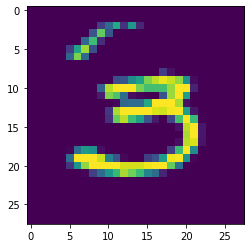

EXPECTED VALUE:  8  PREDICTED VALUE:  2


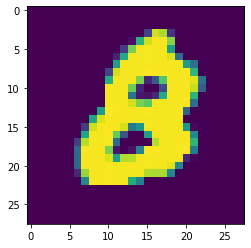

EXPECTED VALUE:  5  PREDICTED VALUE:  3


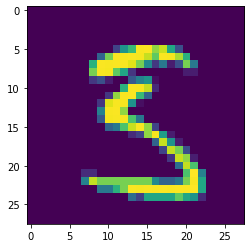

EXPECTED VALUE:  5  PREDICTED VALUE:  8


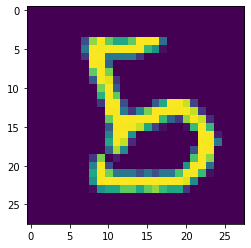

EXPECTED VALUE:  9  PREDICTED VALUE:  8


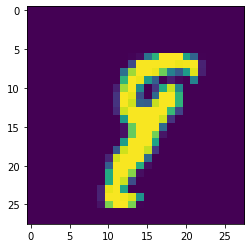

EXPECTED VALUE:  9  PREDICTED VALUE:  8


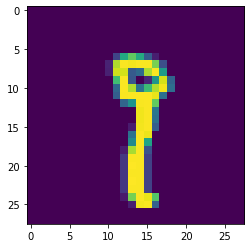

EXPECTED VALUE:  3  PREDICTED VALUE:  7


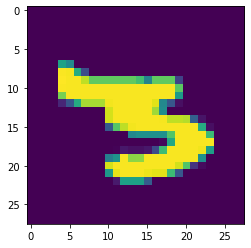

EXPECTED VALUE:  6  PREDICTED VALUE:  5


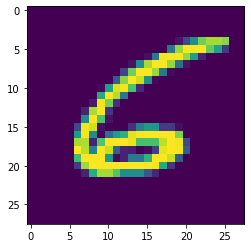

EXPECTED VALUE:  5  PREDICTED VALUE:  7


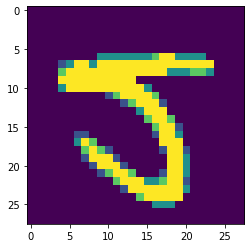

EXPECTED VALUE:  7  PREDICTED VALUE:  2


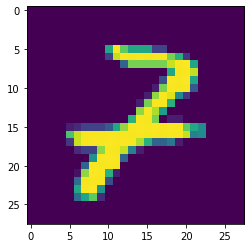

EXPECTED VALUE:  3  PREDICTED VALUE:  2


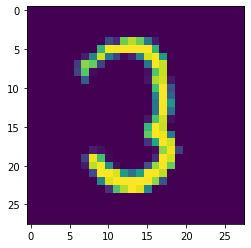

EXPECTED VALUE:  9  PREDICTED VALUE:  8


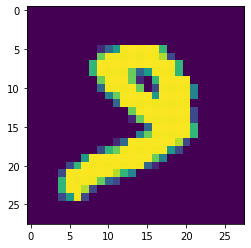

EXPECTED VALUE:  6  PREDICTED VALUE:  1


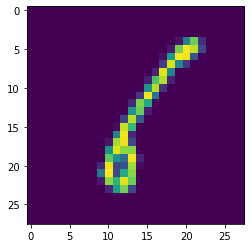

EXPECTED VALUE:  9  PREDICTED VALUE:  0


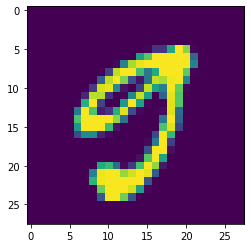

EXPECTED VALUE:  5  PREDICTED VALUE:  0


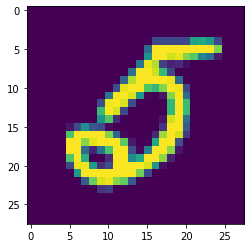

EXPECTED VALUE:  1  PREDICTED VALUE:  2


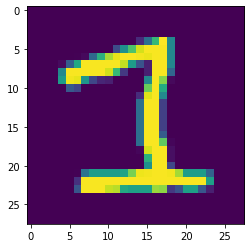

EXPECTED VALUE:  2  PREDICTED VALUE:  8


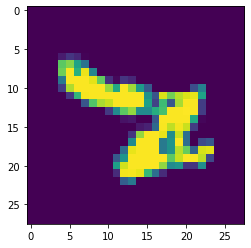

EXPECTED VALUE:  7  PREDICTED VALUE:  9


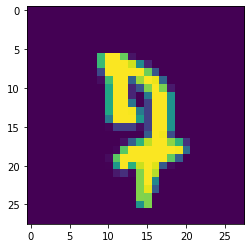

EXPECTED VALUE:  3  PREDICTED VALUE:  8


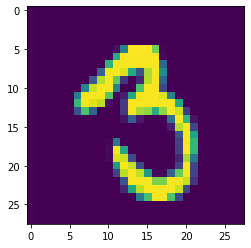

EXPECTED VALUE:  7  PREDICTED VALUE:  1


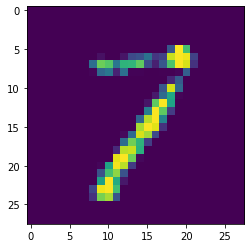

EXPECTED VALUE:  6  PREDICTED VALUE:  5


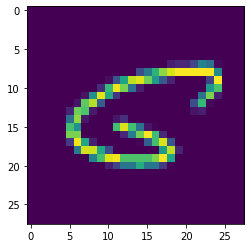

EXPECTED VALUE:  5  PREDICTED VALUE:  3


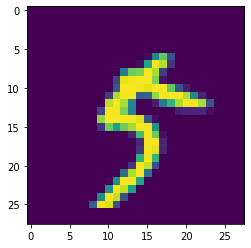

EXPECTED VALUE:  9  PREDICTED VALUE:  4


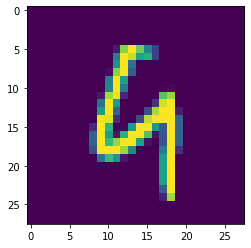

EXPECTED VALUE:  7  PREDICTED VALUE:  1


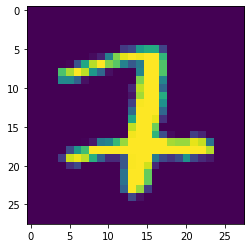

EXPECTED VALUE:  6  PREDICTED VALUE:  1


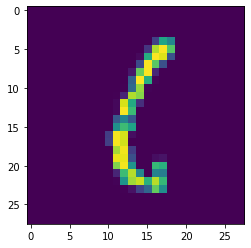

EXPECTED VALUE:  9  PREDICTED VALUE:  1


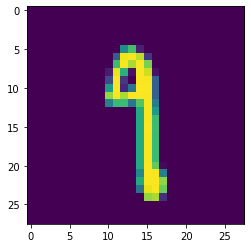

EXPECTED VALUE:  1  PREDICTED VALUE:  8


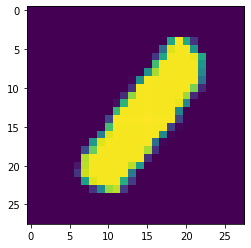

258


In [81]:
y_pred_np = y_pred[9].numpy()
test_y_np = test_y.cpu().numpy()
counter = 0
for k in range(10000):
    if test_y_np[k] != y_pred_np[k]:
        plt.imshow(test_x[k].cpu().numpy().reshape(28,28))
        print("EXPECTED VALUE: ",test_y_np[k]," PREDICTED VALUE: ",y_pred_np[k])
        plt.show()
        counter+=1
print(counter)


In [82]:

## 2 hidden layers
Max_Ac = np.zeros(n_samples)
epoch = np.zeros(n_samples)
epochs= 20
batch_size = 50
n_samples = 20

D_in = 784
D_out= 10
D_hidden = 100
D_hidden1 = np.linspace(10, 200, n_samples)

for k in range(n_samples):
    D_hidden1_idx = int(D_hidden1[k])
    model = nn.Sequential(nn.Linear(D_in,D_hidden),
                    nn.ReLU(),
                    nn.Linear(D_hidden,D_hidden1_idx),
                    nn.LeakyReLU(),
                    nn.Linear(D_hidden1_idx,D_out),
                    nn.LogSoftmax(dim=1)).cuda()
    optimizer=th.optim.Adam(model.parameters(), lr = 0.005)
    loss_fn=nn.NLLLoss()
    y_pred, Max_Ac[k], epoch[k] = train(model, optimizer, loss_fn, epochs, batch_size, train_x, train_y, test_x, test_y)


aining/Validation done
---------- Best : 97.590  at epoch  11  /  20
Epoch: 0	 train Loss: 5.56782..  valid Loss: 0.14657..  valid Accuracy: 95.780
Epoch: 1	 train Loss: 2.72930..  valid Loss: 0.11448..  valid Accuracy: 96.720
Epoch: 2	 train Loss: 2.24350..  valid Loss: 0.11452..  valid Accuracy: 96.640
Epoch: 3	 train Loss: 1.87058..  valid Loss: 0.14872..  valid Accuracy: 96.570
Epoch: 4	 train Loss: 1.72911..  valid Loss: 0.13032..  valid Accuracy: 96.490
Epoch: 5	 train Loss: 1.60358..  valid Loss: 0.13651..  valid Accuracy: 96.760
Epoch: 6	 train Loss: 1.48297..  valid Loss: 0.12066..  valid Accuracy: 97.280
Epoch: 7	 train Loss: 1.37522..  valid Loss: 0.11725..  valid Accuracy: 97.310
Epoch: 8	 train Loss: 1.24603..  valid Loss: 0.11273..  valid Accuracy: 97.440
Epoch: 9	 train Loss: 1.23589..  valid Loss: 0.12269..  valid Accuracy: 97.350
Epoch: 10	 train Loss: 1.13816..  valid Loss: 0.13514..  valid Accuracy: 97.020
Epoch: 11	 train Loss: 1.07165..  valid Loss: 0.12308..  vali

A acurácia max é 97.84 quando temos  160  neurônios na camada intermediaria


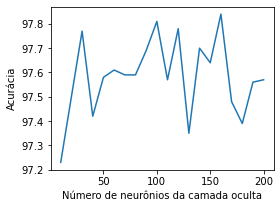

In [84]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(D_hidden1,Max_Ac)
plt.xlabel("Número de neurônios da camada oculta")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos ", 10*(np.argmax(Max_Ac)+1), " neurônios na camada intermediaria")
neuron_hidden_layer = np.argmax(Max_Ac)+1


In [13]:

## 3 hidden layers
epochs= 20
batch_size = 50
n_samples = 100
## model
D_in = 784
D_out= 10
D_hidden = 100
D_hidden1 = 50
D_hidden2 = 20
model = nn.Sequential(nn.Linear(D_in,D_hidden),
                    nn.ReLU(),
                    nn.Linear(D_hidden,D_hidden1),
                    nn.ReLU(),
                    nn.Linear(D_hidden1,D_hidden2),
                    nn.LeakyReLU(),
                    nn.Linear(D_hidden2,D_out),
                    nn.LogSoftmax(dim=1)).cuda()
optimizer=th.optim.Adam(model.parameters(), lr = 0.005)
loss_fn=nn.NLLLoss()
y_pred, max_acc, epoch = train(model, optimizer, loss_fn, epochs, batch_size, train_x, train_y, test_x, test_y)

Epoch: 0	 train Loss: 6.65068..  valid Loss: 0.14402..  valid Accuracy: 95.500
Epoch: 1	 train Loss: 3.03624..  valid Loss: 0.10983..  valid Accuracy: 96.760
Epoch: 2	 train Loss: 2.38488..  valid Loss: 0.11573..  valid Accuracy: 96.560
Epoch: 3	 train Loss: 2.14437..  valid Loss: 0.11597..  valid Accuracy: 96.850
Epoch: 4	 train Loss: 1.79393..  valid Loss: 0.11010..  valid Accuracy: 97.010
Epoch: 5	 train Loss: 1.62007..  valid Loss: 0.11105..  valid Accuracy: 96.930
Epoch: 6	 train Loss: 1.44910..  valid Loss: 0.09878..  valid Accuracy: 97.340
Epoch: 7	 train Loss: 1.46827..  valid Loss: 0.11153..  valid Accuracy: 96.830
Epoch: 8	 train Loss: 1.28826..  valid Loss: 0.10189..  valid Accuracy: 97.550
Epoch: 9	 train Loss: 1.19341..  valid Loss: 0.12303..  valid Accuracy: 97.050
Epoch: 10	 train Loss: 1.09525..  valid Loss: 0.10353..  valid Accuracy: 97.490
Epoch: 11	 train Loss: 1.04708..  valid Loss: 0.11435..  valid Accuracy: 97.330
Epoch: 12	 train Loss: 1.02917..  valid Loss: 0.12

In [14]:
# 1 Conv2D Layer + MaxPooling
epochs = 40
batch_size = 1000
D_out = 10

k = 10
D_in = 21*21*k
# Wout = (Win - F + 2P)/S + 1
# Conv2D
# Wout1 = (28 - 5)/1 + 1 = 24
# MaxPooling
# Wout2 = (24 - 4)/1 + 1 = 21

model = nn.Sequential(nn.Conv2d(1, k, kernel_size=5, stride=1),  # batch_size x k x Wout1 x Wout1
                    nn.MaxPool2d(4, stride=1),                   # batch_size x k x Wout2 x Wout2
                    nn.Flatten(),                                # batch_size x (k*Wout2*Wout2)
                    nn.Linear(D_in,D_out),                       # 10
                    nn.LogSoftmax(dim=1)
                    ).cuda()
optimizer=th.optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.NLLLoss()
y_pred, max_acc, epoch = train(model, optimizer, loss_fn, epochs, batch_size, trainconv_x, trainconv_y, testconv_x, testconv_y)

Epoch: 0	 train Loss: 0.03091..  valid Loss: 0.19754..  valid Accuracy: 94.660
Epoch: 1	 train Loss: 0.01008..  valid Loss: 0.12097..  valid Accuracy: 96.580
Epoch: 2	 train Loss: 0.00679..  valid Loss: 0.08908..  valid Accuracy: 97.410
Epoch: 3	 train Loss: 0.00529..  valid Loss: 0.07348..  valid Accuracy: 97.690
Epoch: 4	 train Loss: 0.00447..  valid Loss: 0.06249..  valid Accuracy: 98.080
Epoch: 5	 train Loss: 0.00395..  valid Loss: 0.06134..  valid Accuracy: 97.980
Epoch: 6	 train Loss: 0.00355..  valid Loss: 0.05183..  valid Accuracy: 98.290
Epoch: 7	 train Loss: 0.00319..  valid Loss: 0.04976..  valid Accuracy: 98.320
Epoch: 8	 train Loss: 0.00297..  valid Loss: 0.04927..  valid Accuracy: 98.360
Epoch: 9	 train Loss: 0.00279..  valid Loss: 0.04646..  valid Accuracy: 98.370
Epoch: 10	 train Loss: 0.00258..  valid Loss: 0.04258..  valid Accuracy: 98.580
Epoch: 11	 train Loss: 0.00245..  valid Loss: 0.04441..  valid Accuracy: 98.530
Epoch: 12	 train Loss: 0.00229..  valid Loss: 0.04

In [16]:
# 2 Conv2D's + 2 MaxPooling
epochs = 40
batch_size = 1000
D_out = 10

k = 10
D_in = 14*14*k*2
# Wout = (Win - F + 2P)/S + 1
# Conv2D
# Wout1 = (28 - 5)/1 + 1 = 24
# MaxPooling
# Wout2 = (24 - 4)/1 + 1 = 21
# Conv2D
# Wout3 = (21 - 5)/1 + 1 = 17
# MaxPooling
# Wout4 = (17 -4)/1 + 1 = 14

model = nn.Sequential(nn.Conv2d(1, k, kernel_size=5, stride=1),  # batch_size x k x Wout1 x Wout1
                    nn.MaxPool2d(4, stride=1),                   # batch_size x k x Wout2 x Wout2
                    nn.Conv2d(k, 2*k, kernel_size = 5, stride=1),# batch_size x 2*k x Wout3 x Wout3
                    nn.MaxPool2d(4, stride=1),                   # batch_size x 2*k x Wout4 x Wout4   
                    nn.Flatten(),                                # batch_size x (2*k*Wout4*Wout4)
                    nn.Linear(D_in,D_out),                       # 10
                    nn.LogSoftmax(dim=1)
                    ).cuda()
optimizer=th.optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.NLLLoss()
y_pred, max_acc, epoch = train(model, optimizer, loss_fn, epochs, batch_size, trainconv_x, trainconv_y, testconv_x, testconv_y)

Epoch: 0	 train Loss: 0.03282..  valid Loss: 0.15629..  valid Accuracy: 95.350
Epoch: 1	 train Loss: 0.00747..  valid Loss: 0.08243..  valid Accuracy: 97.430
Epoch: 2	 train Loss: 0.00490..  valid Loss: 0.06588..  valid Accuracy: 97.920
Epoch: 3	 train Loss: 0.00418..  valid Loss: 0.05489..  valid Accuracy: 98.290
Epoch: 4	 train Loss: 0.00338..  valid Loss: 0.04692..  valid Accuracy: 98.490
Epoch: 5	 train Loss: 0.00305..  valid Loss: 0.04455..  valid Accuracy: 98.520
Epoch: 6	 train Loss: 0.00281..  valid Loss: 0.04044..  valid Accuracy: 98.750
Epoch: 7	 train Loss: 0.00255..  valid Loss: 0.03804..  valid Accuracy: 98.690
Epoch: 8	 train Loss: 0.00238..  valid Loss: 0.03698..  valid Accuracy: 98.770
Epoch: 9	 train Loss: 0.00222..  valid Loss: 0.03872..  valid Accuracy: 98.650
Epoch: 10	 train Loss: 0.00216..  valid Loss: 0.04001..  valid Accuracy: 98.620
Epoch: 11	 train Loss: 0.00204..  valid Loss: 0.03293..  valid Accuracy: 98.960
Epoch: 12	 train Loss: 0.00185..  valid Loss: 0.03